# 環境構築



*   Pythonモジュールへのパス追加





In [3]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI


In [4]:
# import os

# os.chdir("/mnt/MachineLearning")

In [5]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [6]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [7]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [8]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,1130.875541,4683.139767,1,0,0


In [9]:
df_total = df_total.set_index('case_name')

In [10]:
df_total["n_from2sec/S"]

case_name
office2_0_0             204.224242
office2_0_164_aout      238.345455
office2_0_164_bout      183.327273
office2_0_246_aout      240.436364
office2_0_246_bout      232.181818
                           ...    
office3_960_164_bout    155.072727
office3_960_246_aout    134.181818
office3_960_246_bout    117.878788
office3_960_82_aout     158.218182
office3_960_82_bout     160.024242
Name: n_from2sec/S, Length: 431, dtype: float64

In [53]:
# binning
# labels=False: index_labeling
# df_total["n_from2sec/S_bin"] = pd.qcut(df_total["n_from2sec/S"], 4, labels=False)
df_total["countTimeMean_bin"] = pd.qcut(df_total["countTimeMean_sit2stand"], 4, labels=False)

df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,n_from2sec/S_bin,countTimeMean_bin
case_name,,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,1,3
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,0,3
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,0,3


In [12]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [54]:
df_total.std(numeric_only=True)

aircon                     360.876287
ventilation                 83.985694
n_from2sec                 921.844114
n_from2sec/S                36.376848
countTimeMean_sit          219.342164
countTimeMean_sit2stand    758.168789
exhaust_a                    0.495869
exhaust_b                    0.495869
exhaust_off                  0.344132
n_from2sec/S_bin             1.120371
countTimeMean_bin            1.120371
dtype: float64

In [55]:
from sklearn import preprocessing

#meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [56]:
# df_ml = df_meta_standardized.join(df_total[["office", "n_from2sec/S", "countTimeMean_sit2stand"]])
df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_bin"]])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_bin
case_name,,,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993,office2,3
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249,office2,3
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249,office2,2
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249,office2,3
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249,office2,3
...,...,...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249,office3,3
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249,office3,3
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249,office3,3


In [22]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [23]:
officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- bosy: 約26500

In [ ]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。


aircon: air conditioner
airvent: hole of Air vent
body: body of human
layout: deskd and walls
"""


# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

pointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    
    #まずは単純に読み込み、辞書に格納
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        # print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        
            
    """
    ここから都合合わせのため調整
    """
    pc_dict_modified = {}

    pc_dict_modified["aircon"] = pc_dict[OfficePart.aircon]
    pc_dict_modified["airvent"] = pc_dict[OfficePart.airvent]
    
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=2048)
    pc_dict_modified["body"] = pc_body[rand_list, :]
    
    pc_room = pc_dict[OfficePart.room]
    num_sampling_desks = 1024 - len(pc_room)
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    pc_dict_modified["layout"] = np.concatenate([pc_room, pc_sampled_desks])
    
    
    pointCloud_dict[officename] = pc_dict_modified


In [16]:
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_sampled/PointCloud_dict_test.npy'

In [17]:
# import numpy as np

# np.save(pcFilePath, pointCloud_dict, allow_pickle='TRUE')

In [18]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()
pointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

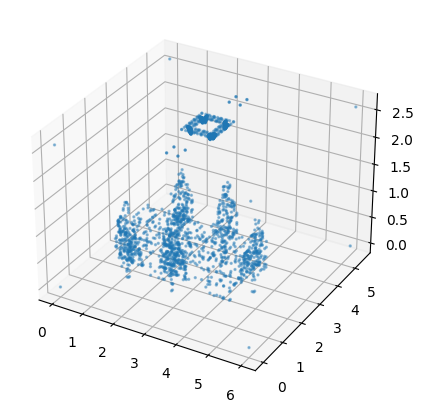

In [19]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office1'])

In [20]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [21]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [22]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [23]:
# def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool):
#     """
#     Return a certain office Dataset.
#     You can specify List of offices.
#     """
    
#     df_main = pd.DataFrame()
    
#     for officename in officename_list:
#         df = df_core[ df_core["office"]==officename ]
#         df_main = pd.concat([df_main, df])
        
#     if shuffle:
#         df_main = df_main.sample(frac=1, random_state=0)
        
#     # meke Dictionary of pointCloudList in order of MainDataFrame
#     pc_list_dict = {"aircon":[], "airvent":[], "body":[], "layout":[], }
#     for officename in df_main["office"]:
#         for key, pc_list in pc_list_dict.items():
#             pc_list.append(pointCloud_dict[officename][key])
            
#     # make input-Dictionary and to ND-Array
#     input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
#     for key, pc in pc_list_dict.items():
#         input_dict[f"pointCloud_{key}"] = np.array(pc)
                
#     return input_dict, df_main["countTimeMean_sit2stand"]
        

In [24]:
def get_officeDataset(
    officename_list:list,
    df_core:pd.DataFrame,
    pointCloud_dict:dict,
    objective_col:str,
    shuffle:bool,
    standardize_pointCloud=True
):
    """
    Return a certain office Dataset.
    You can specify List of offices.
    """
    
    df_main = pd.DataFrame()
    
    for officename in officename_list:
        df = df_core[ df_core["office"]==officename ]
        df_main = pd.concat([df_main, df])
        
    if shuffle:
        df_main = df_main.sample(frac=1, random_state=0)
        
    # meke Dictionary of pointCloudList in order of MainDataFrame
    pc_list = []
    for officename in df_main["office"]:
        pc_list.append(pointCloud_dict[officename])
        
    pc_array = np.array(pc_list)
    
    if standardize_pointCloud:
        pc_array = ( pc_array - pc_array.mean() ) / pc_array.std()
            
    # make input-Dictionary and to ND-Array
    input_dict = {
        "meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]],
        "pointCloud":pc_array,
    }
                
    # return input_dict, df_main["countTimeMean_sit2stand"]
    # return input_dict, df_main["n_from2sec/S"]
    return input_dict, df_main[objective_col]
        

In [57]:
X_dict_sample, y_sample = get_officeDataset(
    list(df_ml["office"].unique()),
    df_ml, pointCloud_dict, "countTimeMean_bin",
    standardize_pointCloud=True,
    shuffle=True
)

In [58]:
X_dict_sample

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office6_0_246_aout   -1.384552     1.265523   1.147695  -0.871311    -0.398249
 office5_660_0         0.446455    -1.666952  -0.871311  -0.871311     2.510993
 office15_960_82_aout  1.278731    -0.689460   1.147695  -0.871311    -0.398249
 office4_660_82_bout   0.446455    -0.689460  -0.871311   1.147695    -0.398249
 office2_360_246_aout -0.385821     1.265523   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office10_0_246_bout  -1.384552     1.265523  -0.871311   1.147695    -0.398249
 office4_360_82_bout  -0.385821    -0.689460  -0.871311   1.147695    -0.398249
 office1_960_246_aout  1.278731     1.265523   1.147695  -0.871311    -0.398249
 office15_660_82_aout  0.446455    -0.689460   1.147695  -0.871311    -0.398249
 office6_960_0         1.278731 

In [59]:
y_sample

case_name
office6_0_246_aout      0
office5_660_0           1
office15_960_82_aout    0
office4_660_82_bout     2
office2_360_246_aout    0
                       ..
office10_0_246_bout     3
office4_360_82_bout     2
office1_960_246_aout    0
office15_660_82_aout    2
office6_960_0           2
Name: countTimeMean_bin, Length: 431, dtype: int64

In [60]:
y_sample.nunique()

4

In [29]:
# def get_dataset(df_main, df_meta):
#     '''
#     説明変数と目的変数をNDArrayに変換する
#     '''
    
#     pc_aircon_list = []
#     pc_airvent_list = []
#     pc_body_list = []
#     pc_layout_list = []
    
#     metaArray_list = []

#     RoI_list = []

#     for index, row in df_total.iterrows():
#         office_name = row["office"]
#         pc_aircon_list.append(pointCloud_dict[office_name]["aircon"])
#         pc_airvent_list.append(pointCloud_dict[office_name]["airvent"])
#         pc_body_list.append(pointCloud_dict[office_name]["body"])
#         pc_layout_list.append(pointCloud_dict[office_name]["layout"])
        
#         metaArray_list.append(df_meta_standardized.loc[index])
            
#         RoI_list.append(df_main["countTimeMean_sit2stand"].loc[index])
#         # RoI_list.append(df_main["count_timeMean"].loc[case_index])

#     officename_array = df_total["office"].to_numpy()
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pc_aircon_array = np.array(pc_aircon_list)
#     pc_airvent_array = np.array(pc_airvent_list)
#     pc_body_array = np.array(pc_body_list)
#     pc_layout_array = np.array(pc_layout_list)
    
#     pc_array_dict = {"aircon":pc_aircon_array, "airvent":pc_airvent_array, "body":pc_body_array, "layout":pc_layout_array}
    
#     return officename_array, pc_array_dict, metaArray, RoIArray.reshape(-1,1)


In [30]:
# X_officename, X_pc_dict, X_meta, y = get_dataset(df_total, df_meta)

# # print(X_pc.max())
# # X_pc /= X_pc.max() #Normalization
# # print(X_pc.max())

# for key, X_pc in X_pc_dict.items():
#     #Standardization
#     X_pc_dict[key] = ( X_pc - X_pc.mean() ) / X_pc.std()
    
    
# # l_mul = map(lambda X_pc: ( X_pc - X_pc.std() ) / X_pc.std(), X_pc_list)
# # # print(list(l_mul))

# # X_pc_airvent.std()

In [61]:
import sys

def standardization_test(X:np.ndarray):
    """
    標準化されているかをテスト
    """
    threshold = 1.e-5
    
    if abs(X.mean()) > threshold:
        sys.stderr.write(f'StandardizationError: mean= {X.mean()}\n')
        
    if abs(X.std() - 1.) > threshold:
        sys.stderr.write(f'StandardizationError: std= {X.std()}')
        

In [62]:
# print(X_officename.shape)

for key, value in X_dict_sample.items():
    if key == "meta":
        for column_name, item in value.iteritems():
            X = item.values
            standardization_test(X)
            print(column_name)
            print(X.shape, X.mean(), X.std())
        
    else:
        standardization_test(value)
        
        standardization_test(X)
        print(key)
        print(X.shape, X.mean(), X.std())
    
# print(X_meta.shape, X_meta.mean(), X_meta.var())

# print(y.shape, y.mean(), y.var())

aircon
(431,) 5.976142499142374e-17 1.0
ventilation
(431,) 1.772235361814635e-16 0.9999999999999999
exhaust_a
(431,) -4.12147758561543e-17 0.9999999999999999
exhaust_b
(431,) -2.472886551369258e-17 0.9999999999999998
exhaust_off
(431,) -2.2668126720884866e-17 1.0
pointCloud
(431,) -2.2668126720884866e-17 1.0


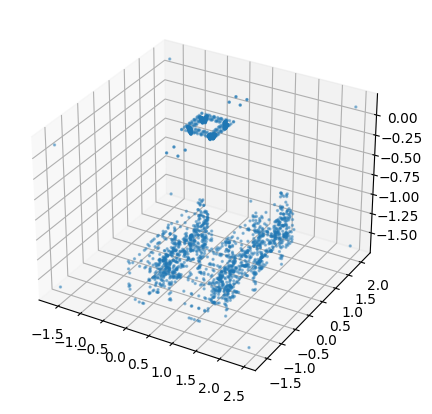

In [33]:
plot3d_points(X_dict_sample["pointCloud"][0, :,:])

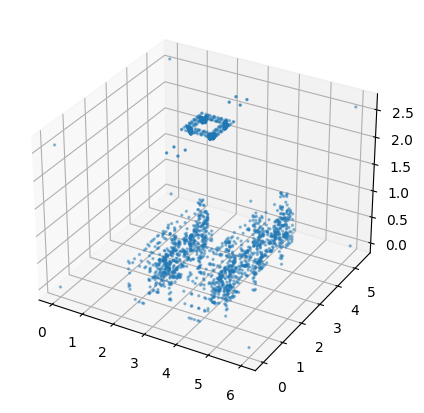

In [34]:
plot3d_points(pointCloud_dict["office6"])

# チューニング

In [169]:
# office_list = list(df_total["office"].unique())
# # office_list = ["office1", "office2", "office3", "office4", "office5", "office6", ]

# office_list

In [160]:
# test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
test_office_list = ["office1", "office7", "office10", "office16", "office28", ]
# test_office_list = office_list

test_office_list

['office1', 'office7', 'office10', 'office16', 'office28']

In [170]:
idealOffice_list = []

for office in office_list:
    df_office = df_total[df_total["office"]==office]
    if df_office["countTimeMean_bin"].nunique() == 4:
        idealOffice_list.append(office)
        

office_list = idealOffice_list
office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office16',
 'office7',
 'office10',
 'office28',
 'office5']

In [37]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12977095142919276741
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739763712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12932115773935301294
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-22 03:12:04.786663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9288 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [38]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [68]:
from tensorflow import keras
import PointNet

def myPointNet(trial, input_pointCloud:keras.Input):
        
    hp_conv_layers = trial.suggest_int('conv_layers', 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters-{i}', 32, 256, step=32)
        
        x = PointNet.conv_bn(x, hp_filters)
        
#         x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
#         x = keras.layers.BatchNormalization(momentum=0.99)(x)       
#         x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [185]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/classification_countTimeMean_ideal_accObjective.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    
    input_list = []
    features_list = []
    for key, value in X_dict_sample.items():
        if key == "meta":
            # MetaData
            input_meta = keras.Input(shape=(len(value.columns), ), name='meta')
            
            # append metaData to input_list
            input_list.append(input_meta)

            # append metaData to features_list
            features_list.append(input_meta)
            
        elif key == "pointCloud":
            # PointCloud
            input_pc = keras.Input(shape=(value.shape[1], 3), name=key)

            # append pointClouds to input_list
            input_list.append(input_pc)

            # append feturesOfPointClouds to features_list
            features_list.append(myPointNet(trial, input_pointCloud=input_pc))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    x = keras.layers.Dense(y_sample.nunique())(x)
    outputs = keras.layers.Softmax()(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        # loss='mse',
        # metrics=['mae'],
        loss='sparse_categorical_crossentropy',
        metrics=["sparse_categorical_accuracy"],
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, fit_office_list, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    print("*** clear_session() occured ! ***")
    
    acc_min_list = []
    for val_office in val_office_list:
        
        train_office_list = [office for office in fit_office_list if office != val_office]
    
        X_dict_train, y_train = get_officeDataset(train_office_list, 
                                                  df_ml, pointCloud_dict, "countTimeMean_bin",
                                                  standardize_pointCloud=True, shuffle=True)
        X_dict_val, y_val = get_officeDataset([val_office],
                                              df_ml, pointCloud_dict, "countTimeMean_bin",
                                              standardize_pointCloud=True, shuffle=False)
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            # callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            callbacks = [EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0, patience=10)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        # val_loss_list = history.history['val_loss'][-10:] #List of MSE
        val_acc_list = history.history['val_sparse_categorical_accuracy'][-10:] #List of Accuracy
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        # mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        acc_min = np.max(val_acc_list) #終盤のaccのmin（振動抑制が目的）
        acc_min_list.append(acc_min)
        
        print("(train, val): ", ([s.replace('office', '') for s in train_office_list], val_office), acc_min)

    #交差検証の結果の平均値を目的関数
    return np.mean(acc_min_list)#, np.mean(mse_min_list)


db_path

'/mnt/MachineLearning/OptunaLog/classification_countTimeMean_ideal_accObjective.db'

In [ ]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'
    
    fit_office_list = [office for office in idealOffice_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    #============= OPTUNA Optimization with RandomSampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.RandomSampler(),
        direction='maximize',#'minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================
    
    
    #============= OPTUNA Optimization with TPESampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.TPESampler(),
        direction='maximize',#'minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================


test_office: office1


[I 2022-12-27 00:43:28,926] A new study created in RDB with name: office1_is_test


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3214285671710968
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 00:43:40,974] Trial 0 finished with value: 0.526785708963871 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 160, 'dense_layers': 0, 'lr': 0.029767149887270385, 'batch_size': 64}. Best is trial 0 with value: 0.526785708963871.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.2857142984867096
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 00:44:49,929] Trial 1 finished with value: 0.5267857164144516 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'units-2': 448, 'lr': 0.0003578615858390615, 'batch_size': 1}. Best is trial 1 with value: 0.5267857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:45:35,704] Trial 2 finished with value: 0.5267857015132904 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 192, 'lr': 6.80599468349352e-05, 'batch_size': 1}. Best is trial 1 with value: 0.5267857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:45:45,020] Trial 3 finished with value: 0.3928571380674839 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 256, 'units-2': 384, 'units-3': 512, 'lr': 5.268845949765435e-05, 'batch_size': 32}. Best is trial 1 with value: 0.5267857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 00:45:59,421] Trial 4 finished with value: 0.5446428582072258 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 32, 'filters-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 320, 'units-2': 512, 'lr': 0.04269232669159981, 'batch_size': 64}. Best is trial 4 with value: 0.5446428582072258.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.8928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 00:46:51,630] Trial 5 finished with value: 0.6517857164144516 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 384, 'units-3': 320, 'lr': 0.028771124550106573, 'batch_size': 1}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:47:01,988] Trial 6 finished with value: 0.3660714225843549 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'units-2': 320, 'lr': 7.749478300413137e-05, 'batch_size': 128}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.4642857015132904
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 00:47:18,563] Trial 7 finished with value: 0.6071428433060646 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'lr': 0.004776325640023769, 'batch_size': 4}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 00:47:31,497] Trial 8 finished with value: 0.4196428619325161 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 32, 'dense_layers': 0, 'lr': 0.0073609671852229745, 'batch_size': 64}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:47:41,788] Trial 9 finished with value: 0.4821428507566452 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'lr': 0.05086109373394088, 'batch_size': 64}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 00:47:57,156] Trial 10 finished with value: 0.633928582072258 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'units-2': 64, 'units-3': 320, 'lr': 0.029820733645889563, 'batch_size': 4}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:48:08,182] Trial 11 finished with value: 0.5357142835855484 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 64, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.023900224529740687, 'batch_size': 128}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:48:16,551] Trial 12 finished with value: 0.5178571417927742 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'units-2': 192, 'units-3': 384, 'lr': 0.0014351662970317953, 'batch_size': 64}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.25
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 00:48:34,522] Trial 13 finished with value: 0.5446428656578064 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.06099181446923388, 'batch_size': 4}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:48:43,173] Trial 14 finished with value: 0.3928571380674839 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'units-2': 256, 'units-3': 256, 'lr': 0.00158309447246256, 'batch_size': 128}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 00:48:55,414] Trial 15 finished with value: 0.36607142724096775 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 128, 'dense_layers': 0, 'lr': 3.843928908368762e-05, 'batch_size': 4}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:49:05,131] Trial 16 finished with value: 0.3660714225843549 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 64, 'units-3': 512, 'lr': 0.0009588092635731707, 'batch_size': 16}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:49:18,149] Trial 17 finished with value: 0.5357142835855484 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 256, 'units-2': 128, 'lr': 0.012047331802758533, 'batch_size': 4}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:49:32,840] Trial 18 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'units-3': 192, 'lr': 0.005594710875946634, 'batch_size': 16}. Best is trial 5 with value: 0.6517857164144516.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 00:50:06,915] Trial 19 finished with value: 0.6875 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 0, 'lr': 0.003490067297021166, 'batch_size': 1}. Best is trial 19 with value: 0.6875.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 00:50:15,090] Trial 20 finished with value: 0.27678571455180645 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.00013737207338068106, 'batch_size': 64}. Best is trial 19 with value: 0.6875.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:50:22,632] Trial 21 finished with value: 0.3482142807915807 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 2.2289748314033836e-05, 'batch_size': 128}. Best is trial 19 with value: 0.6875.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 00:50:41,707] Trial 22 finished with value: 0.6428571417927742 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 224, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'lr': 0.00019865578121451907, 'batch_size': 4}. Best is trial 19 with value: 0.6875.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 00:50:54,540] Trial 23 finished with value: 0.5982142984867096 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 320, 'lr': 0.011473274089210903, 'batch_size': 16}. Best is trial 19 with value: 0.6875.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 00:51:56,317] Trial 24 finished with value: 0.5803571492433548 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 64, 'filters-2': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 320, 'units-2': 256, 'units-3': 384, 'lr': 0.0043757060440688, 'batch_size': 1}. Best is trial 19 with value: 0.6875.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 00:52:10,174] Trial 25 finished with value: 0.6875000149011612 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 128, 'lr': 0.0014957736997105074, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 00:52:19,749] Trial 26 finished with value: 0.5714285746216774 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 448, 'units-2': 384, 'lr': 0.021095348414231704, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.4642857015132904
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 00:52:30,541] Trial 27 finished with value: 0.5178571417927742 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.03217327814493505, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 00:52:40,691] Trial 28 finished with value: 0.4464285746216774 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 160, 'dense_layers': 0, 'lr': 2.4561828532605514e-05, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:52:50,668] Trial 29 finished with value: 0.3928571380674839 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 512, 'lr': 0.0008699376073008878, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-27 00:52:58,586] Trial 30 finished with value: 0.4375 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'lr': 0.0009648333672651394, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:53:11,650] Trial 31 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 384, 'units-3': 320, 'lr': 0.0008537216062840035, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:53:22,725] Trial 32 finished with value: 0.5357142835855484 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 128, 'units-2': 384, 'units-3': 256, 'lr': 0.00025103309653730946, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 00:53:33,192] Trial 33 finished with value: 0.6607142835855484 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 384, 'lr': 0.0148936037674673, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 00:53:46,509] Trial 34 finished with value: 0.23214285913854837 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 192, 'units-3': 512, 'lr': 2.93175985302526e-05, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:53:58,084] Trial 35 finished with value: 0.5357142835855484 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'units-2': 320, 'units-3': 256, 'lr': 0.012153618594952474, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 00:54:04,976] Trial 36 finished with value: 0.5446428507566452 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.0005358000785598483, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:54:11,776] Trial 37 finished with value: 0.41071428172290325 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'units-2': 128, 'lr': 1.093932278751557e-05, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:54:24,584] Trial 38 finished with value: 0.3928571380674839 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 256, 'units-2': 256, 'units-3': 512, 'lr': 0.003222424613197399, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 00:54:37,493] Trial 39 finished with value: 0.5357142761349678 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.0016415969080586187, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:54:51,334] Trial 40 finished with value: 0.5714285671710968 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 96, 'filters-2': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 256, 'units-2': 128, 'lr': 0.014888144879139285, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:55:09,310] Trial 41 finished with value: 0.4642857126891613 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 320, 'units-2': 448, 'lr': 0.009261031027276021, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:55:22,135] Trial 42 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 512, 'units-2': 128, 'units-3': 448, 'lr': 0.038414240996998264, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 00:56:05,711] Trial 43 finished with value: 0.6339285671710968 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'units-2': 384, 'lr': 0.008352479815870168, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 00:56:21,502] Trial 44 finished with value: 0.3125 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 256, 'filters-2': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'lr': 2.644976625206569e-05, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:56:32,677] Trial 45 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 160, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 3.572425703863673e-05, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:56:45,362] Trial 46 finished with value: 0.3660714225843549 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'units-3': 320, 'lr': 0.004732938058399878, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:57:01,286] Trial 47 finished with value: 0.3928571380674839 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'lr': 1.7779951102967905e-05, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:57:11,720] Trial 48 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 128, 'units-2': 320, 'units-3': 128, 'lr': 0.0034902276606000966, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 00:57:20,754] Trial 49 finished with value: 0.4107142873108387 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 4.823431857449473e-05, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:57:33,987] Trial 50 finished with value: 0.5357142835855484 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'units-2': 512, 'units-3': 320, 'lr': 0.0008651562034701253, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:57:48,820] Trial 51 finished with value: 0.3928571380674839 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 32, 'filters-2': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'units-2': 448, 'units-3': 320, 'lr': 0.01776334804451899, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-27 00:58:00,713] Trial 52 finished with value: 0.473214291036129 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'lr': 1.5716841818182216e-05, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 00:58:06,530] Trial 53 finished with value: 0.3125000074505806 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 5.727263407731869e-05, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:58:15,220] Trial 54 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'lr': 0.017356235623340734, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.25
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:58:23,545] Trial 55 finished with value: 0.401785708963871 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 384, 'lr': 0.004539401770579543, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 00:58:39,014] Trial 56 finished with value: 0.5446428582072258 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 0.006598225746398379, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:58:47,870] Trial 57 finished with value: 0.37499999441206455 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'lr': 0.00016495510556929798, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:59:00,387] Trial 58 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 0.004861865654041187, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 00:59:14,662] Trial 59 finished with value: 0.5625000074505806 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 448, 'lr': 0.04948074087232473, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 00:59:30,338] Trial 60 finished with value: 0.6607142686843872 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'units-2': 320, 'lr': 0.0014799932081846201, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 00:59:38,055] Trial 61 finished with value: 0.2321428582072258 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 128, 'lr': 3.79926104947465e-05, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 00:59:49,755] Trial 62 finished with value: 0.3928571380674839 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 448, 'units-2': 256, 'units-3': 128, 'lr': 0.001120443815708979, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:00:00,214] Trial 63 finished with value: 0.6339285597205162 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 128, 'lr': 0.0022349285785371042, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:00:09,646] Trial 64 finished with value: 0.4107142873108387 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.002704831881889785, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:00:21,781] Trial 65 finished with value: 0.4464285708963871 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 448, 'units-3': 192, 'lr': 0.0007696163309785385, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:00:36,222] Trial 66 finished with value: 0.4553571455180645 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 256, 'filters-2': 128, 'dense_layers': 0, 'lr': 1.707327270915885e-05, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 01:00:51,383] Trial 67 finished with value: 0.5446428656578064 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 1.0047949975421522e-05, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:01:06,455] Trial 68 finished with value: 0.6249999850988388 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 320, 'lr': 0.0013873226814117019, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 01:01:28,947] Trial 69 finished with value: 0.535714291036129 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 96, 'filters-2': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 512, 'units-2': 128, 'lr': 0.00028893264421142866, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:01:39,964] Trial 70 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.0019859952399748316, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:01:49,690] Trial 71 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'units-2': 384, 'units-3': 256, 'lr': 0.017876319829643432, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:01:58,039] Trial 72 finished with value: 0.13392857369035482 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 448, 'lr': 4.0137969323554615e-05, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:02:18,615] Trial 73 finished with value: 0.3660714225843549 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'units-2': 320, 'units-3': 448, 'lr': 0.00010008722001462762, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:02:25,731] Trial 74 finished with value: 0.5357142835855484 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 256, 'lr': 0.051964322118520756, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:02:33,656] Trial 75 finished with value: 0.4553571343421936 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.00040248758520593166, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:02:44,598] Trial 76 finished with value: 0.5089285671710968 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 0, 'lr': 0.0006521217052279495, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:02:55,082] Trial 77 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 64, 'lr': 0.08271794034989916, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 01:03:11,773] Trial 78 finished with value: 0.24999999906867743 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 224, 'filters-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 384, 'units-2': 384, 'lr': 1.3492975147035839e-05, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:03:24,165] Trial 79 finished with value: 0.5357142835855484 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.024047011267691275, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:03:38,041] Trial 80 finished with value: 0.5357142835855484 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'units-2': 128, 'units-3': 192, 'lr': 0.03514594558322617, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:04:33,883] Trial 81 finished with value: 0.5535714328289032 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 192, 'filters-2': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 256, 'lr': 4.341376340694163e-05, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 01:05:22,000] Trial 82 finished with value: 0.4196428619325161 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 96, 'dense_layers': 0, 'lr': 0.00025382282281840554, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5357142686843872


[I 2022-12-27 01:05:35,448] Trial 83 finished with value: 0.4107142882421613 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 64, 'lr': 0.00023711656674815069, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:05:47,734] Trial 84 finished with value: 0.5267857015132904 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 192, 'filters-2': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.0007107428663607412, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:06:00,435] Trial 85 finished with value: 0.5446428582072258 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 128, 'units-2': 384, 'lr': 0.07037233591044813, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:06:37,194] Trial 86 finished with value: 0.43749999813735485 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'units-2': 64, 'units-3': 256, 'lr': 0.002184654458700202, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:06:53,284] Trial 87 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 320, 'units-2': 64, 'lr': 0.005611544488585012, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:07:34,561] Trial 88 finished with value: 0.43749999068677425 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.000570529879204624, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:07:41,818] Trial 89 finished with value: 0.5803571492433548 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.012228965411300276, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3214285671710968
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:08:16,869] Trial 90 finished with value: 0.5178571566939354 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.00884453540404307, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:08:25,486] Trial 91 finished with value: 0.5892857164144516 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.0005025779163184898, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:08:39,719] Trial 92 finished with value: 0.38392856530845165 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 256, 'filters-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'units-2': 64, 'lr': 0.012352101861942327, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:08:47,719] Trial 93 finished with value: 0.3125 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'lr': 5.08639844664742e-05, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:08:55,603] Trial 94 finished with value: 0.5625 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'units-2': 512, 'units-3': 320, 'lr': 0.0013868934670647711, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:09:10,528] Trial 95 finished with value: 0.3660714225843549 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 192, 'filters-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 192, 'units-2': 256, 'units-3': 320, 'lr': 0.04957288995329603, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:09:26,095] Trial 96 finished with value: 0.3928571380674839 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 224, 'filters-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'units-2': 192, 'lr': 0.002091522524453098, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 01:09:39,013] Trial 97 finished with value: 0.3482142807915807 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 1.4957938066971595e-05, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:09:49,703] Trial 98 finished with value: 0.3928571380674839 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 128, 'units-2': 320, 'units-3': 512, 'lr': 0.00019925885652031746, 'batch_size': 128}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 01:09:59,154] Trial 99 finished with value: 0.5625 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 128, 'dense_layers': 0, 'lr': 0.01121555963439234, 'batch_size': 64}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5357142686843872


[I 2022-12-27 01:09:59,967] Using an existing study with name 'office1_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3214285671710968
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 01:10:34,582] Trial 100 finished with value: 0.5178571566939354 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'lr': 0.0029893102776451996, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 01:11:13,346] Trial 101 finished with value: 0.5267857238650322 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 64, 'lr': 0.0012477019502226377, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3571428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:11:50,230] Trial 102 finished with value: 0.5446428656578064 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'lr': 0.0018178928079697109, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 01:11:58,639] Trial 103 finished with value: 0.633928582072258 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 128, 'lr': 0.028310118565208185, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3214285671710968
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:12:07,580] Trial 104 finished with value: 0.5714285746216774 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'lr': 0.0037277916120942453, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:12:16,047] Trial 105 finished with value: 0.5625 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 64, 'lr': 0.028958129100911254, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:12:24,955] Trial 106 finished with value: 0.6160714328289032 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'lr': 0.02538505628218266, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.2857142984867096
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:12:34,613] Trial 107 finished with value: 0.5714285746216774 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'lr': 0.0024491287180373332, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:13:09,783] Trial 108 finished with value: 0.5267857164144516 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'lr': 0.0017221722288453748, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:13:19,547] Trial 109 finished with value: 0.642857164144516 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'lr': 0.008398678553442255, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:14:02,198] Trial 110 finished with value: 0.5625 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 0.007830830568850712, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 01:14:10,332] Trial 111 finished with value: 0.6517857313156128 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'lr': 0.02180525435210028, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:14:18,068] Trial 112 finished with value: 0.5178571417927742 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'lr': 0.020648254972630044, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:14:27,298] Trial 113 finished with value: 0.5892857238650322 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'lr': 0.029975892401889, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3214285671710968
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:14:37,733] Trial 114 finished with value: 0.5625000074505806 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'lr': 0.020099924075150943, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:14:45,823] Trial 115 finished with value: 0.6160714328289032 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'lr': 0.006022788215372994, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.2857142984867096
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:14:55,040] Trial 116 finished with value: 0.5089285746216774 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 0.015677695311579493, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:15:30,865] Trial 117 finished with value: 0.4464285634458065 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 0.04052552922842798, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.25
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:15:43,249] Trial 118 finished with value: 0.5446428656578064 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'lr': 0.015232787119048059, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.25
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:15:53,316] Trial 119 finished with value: 0.5357142835855484 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 64, 'lr': 0.02493705835571501, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:16:01,691] Trial 120 finished with value: 0.625 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'lr': 0.004023139706021922, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:16:10,332] Trial 121 finished with value: 0.5178571343421936 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 128, 'lr': 0.0010532327324172207, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:16:20,016] Trial 122 finished with value: 0.6696428656578064 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'lr': 0.00985523885129486, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:16:28,349] Trial 123 finished with value: 0.5089285746216774 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'lr': 0.007282727606633784, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 01:16:40,350] Trial 124 finished with value: 0.5982142835855484 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 192, 'lr': 0.008390359334114394, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:16:48,858] Trial 125 finished with value: 0.6160714328289032 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 192, 'lr': 0.010999117615357382, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.8214285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:17:30,559] Trial 126 finished with value: 0.6517857164144516 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'lr': 0.009408143107388594, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.8214285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:17:40,192] Trial 127 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'lr': 0.02853310899366875, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:17:49,967] Trial 128 finished with value: 0.4999999962747097 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'lr': 0.010126325319663261, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:17:58,451] Trial 129 finished with value: 0.4107142873108387 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'lr': 0.01473168066520428, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4642857015132904


[I 2022-12-27 01:18:08,426] Trial 130 finished with value: 0.6071428433060646 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 256, 'lr': 0.03423964504882988, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:18:19,318] Trial 131 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 0.04307844698439619, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.8571428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 01:18:29,909] Trial 132 finished with value: 0.6428571492433548 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 0.045507677175756066, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:18:39,118] Trial 133 finished with value: 0.616071417927742 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 0.04864184279512546, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.8214285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:18:48,668] Trial 134 finished with value: 0.625 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'lr': 0.06601371318507251, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:18:57,778] Trial 135 finished with value: 0.3928571380674839 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 320, 'lr': 0.042198299012658855, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:19:09,377] Trial 136 finished with value: 0.6339285671710968 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.014080804142214211, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:19:18,910] Trial 137 finished with value: 0.4464285708963871 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 0.0936060250156591, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.8214285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:19:28,153] Trial 138 finished with value: 0.5625 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 0.020531187718112798, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:20:05,227] Trial 139 finished with value: 0.580357164144516 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'lr': 0.05525474432541471, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:20:14,186] Trial 140 finished with value: 0.41964284889400005 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 8.396298899759995e-05, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:20:22,378] Trial 141 finished with value: 0.5267857164144516 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 256, 'lr': 0.02710250265515151, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:20:46,520] Trial 142 finished with value: 0.5357142835855484 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 0.0368998890735449, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 01:20:57,569] Trial 143 finished with value: 0.5535714328289032 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 256, 'lr': 0.018320886816791733, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:21:06,978] Trial 144 finished with value: 0.5267857238650322 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'lr': 0.03183170636389262, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:21:16,411] Trial 145 finished with value: 0.633928582072258 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.002972736230079471, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:21:52,379] Trial 146 finished with value: 0.553571417927742 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'lr': 0.0018429670460310835, 'batch_size': 1}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.8571428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:22:05,863] Trial 147 finished with value: 0.5714285671710968 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'lr': 0.023436472071249635, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3214285671710968
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:22:19,645] Trial 148 finished with value: 0.5892857238650322 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.005060449894638203, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 01:22:29,354] Trial 149 finished with value: 0.5089285746216774 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 128, 'lr': 0.07566120358617986, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:22:39,104] Trial 150 finished with value: 0.6160714402794838 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0030644937576517657, 'batch_size': 32}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:22:56,746] Trial 151 finished with value: 0.5625 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.04464432566598361, 'batch_size': 4}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064


[I 2022-12-27 01:23:08,789] Trial 152 finished with value: 0.6517857313156128 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0014672447290897312, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:23:21,404] Trial 153 finished with value: 0.6696428656578064 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.001362569078830631, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:23:34,756] Trial 154 finished with value: 0.6428571492433548 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0013385517703714354, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:23:47,152] Trial 155 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0014533662096903716, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3571428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:23:56,947] Trial 156 finished with value: 0.5982142984867096 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.001545063154965848, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:24:06,971] Trial 157 finished with value: 0.6696428656578064 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0010956782053207544, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:24:16,755] Trial 158 finished with value: 0.6428571492433548 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'lr': 0.0009402255613418772, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:24:28,747] Trial 159 finished with value: 0.6785714328289032 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0011522065085651234, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:24:39,739] Trial 160 finished with value: 0.607142873108387 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'lr': 0.0010454681333779557, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:24:51,681] Trial 161 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.001988822587689645, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.4642857015132904
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:25:03,007] Trial 162 finished with value: 0.6250000074505806 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.001157075836117637, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:25:14,357] Trial 163 finished with value: 0.6875000149011612 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.001991443917853027, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:25:24,822] Trial 164 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0019681546864182653, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:25:33,998] Trial 165 finished with value: 0.6517857313156128 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0020614515653353434, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:25:44,549] Trial 166 finished with value: 0.607142873108387 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0014730027142034851, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:25:55,002] Trial 167 finished with value: 0.6517857313156128 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0024550802635637786, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:26:05,758] Trial 168 finished with value: 0.6428571492433548 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'lr': 0.0017702467473808025, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:26:16,432] Trial 169 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0020748410856209834, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:26:27,658] Trial 170 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0012876370642074197, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:26:38,448] Trial 171 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0008173917731011868, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:26:49,724] Trial 172 finished with value: 0.6160714402794838 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.000805289341894806, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:27:01,507] Trial 173 finished with value: 0.6517857313156128 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0012395160681827522, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:27:11,707] Trial 174 finished with value: 0.6250000149011612 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'lr': 0.0006475157960506027, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:27:22,324] Trial 175 finished with value: 0.6696428656578064 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0020327661180854183, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:27:34,374] Trial 176 finished with value: 0.6696428656578064 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0021613887049002473, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:27:45,242] Trial 177 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.002100924394418586, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:27:55,116] Trial 178 finished with value: 0.6160714402794838 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.002488636912241719, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:28:06,700] Trial 179 finished with value: 0.6785714328289032 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.002001527731176878, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:28:17,366] Trial 180 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0016865140972826863, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:28:28,442] Trial 181 finished with value: 0.6696428656578064 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.002109087395147533, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:28:39,000] Trial 182 finished with value: 0.6696428656578064 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0018447586160294626, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:28:48,792] Trial 183 finished with value: 0.6071428656578064 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0028730935727190572, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:29:00,243] Trial 184 finished with value: 0.6250000149011612 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0020289389507574013, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:29:10,875] Trial 185 finished with value: 0.6071428656578064 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.003471950828886368, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:29:22,126] Trial 186 finished with value: 0.6696428656578064 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.001714208502330696, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:29:33,410] Trial 187 finished with value: 0.6517857164144516 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 384, 'lr': 0.0017982356898810328, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:29:44,260] Trial 188 finished with value: 0.6785714328289032 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.001284040982195942, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:29:54,909] Trial 189 finished with value: 0.6517857313156128 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.001077990483205634, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:30:04,951] Trial 190 finished with value: 0.6517857313156128 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'lr': 0.0008395350673396509, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:30:16,968] Trial 191 finished with value: 0.6339285671710968 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.002458062383497978, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:30:29,135] Trial 192 finished with value: 0.642857164144516 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0015450275775082747, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:30:39,318] Trial 193 finished with value: 0.6607142984867096 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0022295411617572532, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:30:50,018] Trial 194 finished with value: 0.6517857313156128 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0022554732036999215, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:31:00,926] Trial 195 finished with value: 0.6785714328289032 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0019612807265663034, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:31:10,668] Trial 196 finished with value: 0.5982142984867096 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 0.0015839970911323172, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:31:20,702] Trial 197 finished with value: 0.6785714328289032 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'lr': 0.001161457666502745, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:31:31,470] Trial 198 finished with value: 0.633928582072258 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'lr': 0.0012173049547531342, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:31:43,427] Trial 199 finished with value: 0.6696428507566452 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 512, 'lr': 0.0009541831816266185, 'batch_size': 16}. Best is trial 25 with value: 0.6875000149011612.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.6071428656578064


[I 2022-12-27 01:31:44,334] A new study created in RDB with name: office7_is_test


test_office: office7
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 01:31:52,373] Trial 0 finished with value: 0.4839743673801422 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.03731558101054791, 'batch_size': 16}. Best is trial 0 with value: 0.4839743673801422.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7857142686843872


[I 2022-12-27 01:32:03,927] Trial 1 finished with value: 0.483974352478981 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.0008849000187142808, 'batch_size': 32}. Best is trial 0 with value: 0.4839743673801422.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:32:34,881] Trial 2 finished with value: 0.13163919653743505 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 128, 'lr': 0.00644470530739402, 'batch_size': 1}. Best is trial 0 with value: 0.4839743673801422.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 01:32:51,104] Trial 3 finished with value: 0.42284799739718437 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.0016001716460972255, 'batch_size': 64}. Best is trial 0 with value: 0.4839743673801422.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.8571428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:33:43,787] Trial 4 finished with value: 0.6398809626698494 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'units-2': 128, 'lr': 0.0002423110638912021, 'batch_size': 1}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 01:33:53,596] Trial 5 finished with value: 0.3768315017223358 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 5.624388216130768e-05, 'batch_size': 16}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 01:34:07,246] Trial 6 finished with value: 0.24771062470972538 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 64, 'filters-2': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 1.2339679143171872e-05, 'batch_size': 16}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 01:34:26,337] Trial 7 finished with value: 0.4970238134264946 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 224, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.022492572071980053, 'batch_size': 4}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 01:34:33,820] Trial 8 finished with value: 0.3141025733202696 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 5.1308418539914854e-05, 'batch_size': 64}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 01:34:48,263] Trial 9 finished with value: 0.25183150731027126 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 1.2097679636870761e-05, 'batch_size': 4}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:34:58,363] Trial 10 finished with value: 0.6346153914928436 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.02915408575604305, 'batch_size': 32}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 01:35:09,138] Trial 11 finished with value: 0.13163919746875763 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 1.4502236294119228e-05, 'batch_size': 64}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 01:35:17,937] Trial 12 finished with value: 0.5196886509656906 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.00867771998740962, 'batch_size': 128}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 01:35:29,804] Trial 13 finished with value: 0.4097985401749611 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.0001873261304331775, 'batch_size': 4}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:35:42,021] Trial 14 finished with value: 0.4393315054476261 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 160, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 512, 'lr': 1.9081177003667537e-05, 'batch_size': 32}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:35:50,613] Trial 15 finished with value: 0.4940476194024086 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'lr': 6.638520400703908e-05, 'batch_size': 128}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:36:07,863] Trial 16 finished with value: 0.5721153914928436 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 384, 'units-2': 256, 'lr': 0.019070848039542707, 'batch_size': 16}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 01:36:18,139] Trial 17 finished with value: 0.20306776463985443 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 256, 'filters-2': 64, 'dense_layers': 0, 'lr': 1.5569288429633e-05, 'batch_size': 128}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 01:36:33,088] Trial 18 finished with value: 0.3500457890331745 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0005111233640091291, 'batch_size': 4}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:37:26,380] Trial 19 finished with value: 0.6041666865348816 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'lr': 0.003188797197367486, 'batch_size': 1}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:37:37,089] Trial 20 finished with value: 0.40728022530674934 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 128, 'filters-2': 224, 'dense_layers': 0, 'lr': 0.0012434754361133078, 'batch_size': 128}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5641025900840759
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:37:50,648] Trial 21 finished with value: 0.6053113788366318 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 128, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.04899855618783936, 'batch_size': 16}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:38:18,193] Trial 22 finished with value: 0.5863095223903656 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 384, 'lr': 0.00026424898438081706, 'batch_size': 4}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:38:59,352] Trial 23 finished with value: 0.5876831561326981 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'lr': 9.28637052586904e-05, 'batch_size': 1}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 01:39:08,803] Trial 24 finished with value: 0.483974352478981 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 64, 'units-2': 448, 'units-3': 384, 'lr': 0.0019614400232210267, 'batch_size': 32}. Best is trial 4 with value: 0.6398809626698494.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5641025900840759
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 01:39:31,954] Trial 25 finished with value: 0.641025647521019 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'units-2': 448, 'lr': 0.005775746796057629, 'batch_size': 4}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5641025900840759
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.8214285969734192
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:39:39,393] Trial 26 finished with value: 0.6231685131788254 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.0569873885793841, 'batch_size': 128}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:39:50,503] Trial 27 finished with value: 0.3383699618279934 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 448, 'units-2': 192, 'units-3': 192, 'lr': 0.004926037049995694, 'batch_size': 128}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:39:59,719] Trial 28 finished with value: 0.5375457778573036 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 64, 'units-2': 384, 'lr': 0.004989758026256712, 'batch_size': 32}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 01:40:14,804] Trial 29 finished with value: 0.5503663122653961 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.006429907389562477, 'batch_size': 32}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:41:02,712] Trial 30 finished with value: 0.3411172144114971 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 256, 'filters-2': 224, 'dense_layers': 0, 'lr': 1.1363792133012285e-05, 'batch_size': 1}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:41:13,778] Trial 31 finished with value: 0.292353474535048 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'lr': 1.5445092561186196e-05, 'batch_size': 16}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:42:14,162] Trial 32 finished with value: 0.5464743599295616 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'units-2': 448, 'units-3': 512, 'lr': 0.00024012132014326226, 'batch_size': 1}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:42:28,145] Trial 33 finished with value: 0.4214743636548519 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.00038889597058652987, 'batch_size': 64}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6410256624221802
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 01:43:29,654] Trial 34 finished with value: 0.5888278409838676 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 224, 'filters-2': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'units-2': 256, 'units-3': 448, 'lr': 0.0032025455303844245, 'batch_size': 1}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 01:44:08,688] Trial 35 finished with value: 0.6080586314201355 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 160, 'dense_layers': 0, 'lr': 0.005989172904485898, 'batch_size': 1}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:44:15,355] Trial 36 finished with value: 0.38804945163428783 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 3.1472195945988825e-05, 'batch_size': 16}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:44:26,788] Trial 37 finished with value: 0.3500457825139165 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 512, 'units-2': 512, 'units-3': 448, 'lr': 0.06918871703060712, 'batch_size': 16}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 01:44:35,997] Trial 38 finished with value: 0.2566391956061125 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 512, 'lr': 0.0001222015751148168, 'batch_size': 32}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.692307710647583
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:44:48,513] Trial 39 finished with value: 0.6373626440763474 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'units-2': 384, 'lr': 0.013384381434470469, 'batch_size': 16}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6410256624221802
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:45:01,598] Trial 40 finished with value: 0.5352564081549644 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.031466418692633676, 'batch_size': 32}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6410256624221802
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:45:58,373] Trial 41 finished with value: 0.588827833533287 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.013015916563151144, 'batch_size': 1}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:46:10,874] Trial 42 finished with value: 0.5464743599295616 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 256, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'lr': 0.02881684029844756, 'batch_size': 128}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:46:25,240] Trial 43 finished with value: 0.3946886397898197 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 192, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.001049908828006617, 'batch_size': 16}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 01:46:36,090] Trial 44 finished with value: 0.4255952434614301 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'lr': 0.006306783689941891, 'batch_size': 16}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.8214285969734192
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:46:44,990] Trial 45 finished with value: 0.6233974397182465 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'units-2': 512, 'lr': 0.008563125748365529, 'batch_size': 128}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 01:46:53,723] Trial 46 finished with value: 0.3679029308259487 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.013699511489389216, 'batch_size': 128}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:47:11,002] Trial 47 finished with value: 0.5899725258350372 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 224, 'filters-2': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 512, 'lr': 0.010267858946925907, 'batch_size': 32}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 01:47:27,782] Trial 48 finished with value: 0.43681318312883377 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'lr': 1.8761124723238663e-05, 'batch_size': 4}. Best is trial 25 with value: 0.641025647521019.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:48:20,440] Trial 49 finished with value: 0.6412545740604401 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 0.0003836877711493695, 'batch_size': 1}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6153846383094788
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:49:13,608] Trial 50 finished with value: 0.6092033088207245 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'units-2': 256, 'lr': 0.0001221542485929036, 'batch_size': 1}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:49:21,680] Trial 51 finished with value: 0.21199633739888668 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 160, 'dense_layers': 0, 'lr': 1.1117743782074573e-05, 'batch_size': 128}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 01:49:41,483] Trial 52 finished with value: 0.4853479936718941 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 224, 'filters-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 128, 'lr': 0.001411998356402542, 'batch_size': 4}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 01:49:53,716] Trial 53 finished with value: 0.4416208751499653 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'lr': 0.0002824414696221577, 'batch_size': 128}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:50:01,591] Trial 54 finished with value: 0.1929945107549429 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'lr': 1.2621820031494443e-05, 'batch_size': 64}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:50:15,867] Trial 55 finished with value: 0.6144688725471497 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 256, 'filters-2': 64, 'dense_layers': 0, 'lr': 0.020169797588074852, 'batch_size': 32}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 01:51:16,529] Trial 56 finished with value: 0.5643314942717552 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 192, 'lr': 0.0005756485027480868, 'batch_size': 1}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:51:24,634] Trial 57 finished with value: 0.5018315017223358 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'units-2': 192, 'units-3': 128, 'lr': 0.060195682858085624, 'batch_size': 128}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 01:51:37,017] Trial 58 finished with value: 0.5455586165189743 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 128, 'lr': 0.03829464137823457, 'batch_size': 16}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:51:45,934] Trial 59 finished with value: 0.421474352478981 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.0007778513428012663, 'batch_size': 128}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 01:51:55,818] Trial 60 finished with value: 0.5375458002090454 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.07830945393371658, 'batch_size': 128}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 01:52:03,452] Trial 61 finished with value: 0.5057234466075897 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.007252581109263694, 'batch_size': 128}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:52:11,269] Trial 62 finished with value: 0.5375457853078842 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.000851023452488275, 'batch_size': 128}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.692307710647583
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 01:52:29,201] Trial 63 finished with value: 0.5837912037968636 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.0020900598838156205, 'batch_size': 4}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 01:52:37,885] Trial 64 finished with value: 0.2744963373988867 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 384, 'units-2': 128, 'lr': 3.329493229573513e-05, 'batch_size': 64}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:52:46,997] Trial 65 finished with value: 0.51968864351511 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 128, 'units-2': 128, 'units-3': 320, 'lr': 0.08354815206163914, 'batch_size': 32}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 01:52:56,253] Trial 66 finished with value: 0.3411172181367874 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.0001821736535793735, 'batch_size': 16}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:53:04,927] Trial 67 finished with value: 0.51968864351511 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'units-2': 64, 'lr': 0.0004959944285873716, 'batch_size': 32}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:53:14,968] Trial 68 finished with value: 0.591117225587368 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.001848519663195281, 'batch_size': 128}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:53:47,394] Trial 69 finished with value: 0.5503662899136543 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 256, 'dense_layers': 0, 'lr': 0.000682449603909154, 'batch_size': 1}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 01:54:06,333] Trial 70 finished with value: 0.3411172144114971 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'units-2': 192, 'lr': 6.371022660994172e-05, 'batch_size': 16}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 01:54:19,337] Trial 71 finished with value: 0.5812728926539421 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'units-2': 128, 'units-3': 448, 'lr': 0.003418973345719096, 'batch_size': 64}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:54:30,910] Trial 72 finished with value: 0.13163919653743505 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'lr': 0.004857111590341989, 'batch_size': 4}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:55:08,104] Trial 73 finished with value: 0.292353474535048 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 192, 'filters-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 320, 'units-2': 192, 'units-3': 64, 'lr': 0.023246774825948845, 'batch_size': 1}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:55:22,086] Trial 74 finished with value: 0.23237179405987263 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 384, 'units-3': 448, 'lr': 3.961052773966147e-05, 'batch_size': 16}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:55:31,270] Trial 75 finished with value: 0.21588828414678574 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0001075636118222754, 'batch_size': 32}. Best is trial 49 with value: 0.6412545740604401.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:56:25,029] Trial 76 finished with value: 0.6680402979254723 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 192, 'filters-2': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 256, 'units-2': 64, 'units-3': 448, 'lr': 0.0025369061172515065, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:56:36,733] Trial 77 finished with value: 0.5132783874869347 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 32, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.0003156914033154681, 'batch_size': 64}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:56:47,544] Trial 78 finished with value: 0.3857600688934326 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 128, 'lr': 0.0038018323900387545, 'batch_size': 64}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:56:57,859] Trial 79 finished with value: 0.3500457825139165 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'units-2': 512, 'lr': 0.0007939331863522253, 'batch_size': 64}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 01:57:10,542] Trial 80 finished with value: 0.4482600763440132 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 128, 'units-2': 384, 'lr': 7.736644288892001e-05, 'batch_size': 64}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 01:57:22,984] Trial 81 finished with value: 0.18933150451630354 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 256, 'filters-2': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'units-2': 448, 'units-3': 320, 'lr': 8.2115159350098e-05, 'batch_size': 64}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:57:54,468] Trial 82 finished with value: 0.45718864351511 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'lr': 2.2689887096104902e-05, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 01:58:04,868] Trial 83 finished with value: 0.2786172227934003 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'units-2': 320, 'units-3': 320, 'lr': 0.046191824333036965, 'batch_size': 64}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 01:58:14,509] Trial 84 finished with value: 0.42902930825948715 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'units-2': 192, 'units-3': 64, 'lr': 6.251614457252318e-05, 'batch_size': 128}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:58:27,368] Trial 85 finished with value: 0.5018314942717552 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 32, 'filters-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 256, 'units-2': 320, 'units-3': 64, 'lr': 0.010481093471325868, 'batch_size': 32}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 01:58:38,753] Trial 86 finished with value: 0.3255494460463524 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 64, 'lr': 0.0003459562587076196, 'batch_size': 16}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6410256624221802
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 01:58:55,286] Trial 87 finished with value: 0.6156135648488998 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 160, 'dense_layers': 0, 'lr': 0.016041081241750303, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-27 01:59:07,306] Trial 88 finished with value: 0.43933150358498096 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 0.0006084093940576314, 'batch_size': 128}. Best is trial 76 with value: 0.6680402979254723.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 01:59:50,219] Trial 89 finished with value: 0.6348443329334259 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 256, 'units-2': 384, 'lr': 0.015238574655432574, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:00:02,061] Trial 90 finished with value: 0.43521062657237053 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 64, 'filters-2': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'units-2': 128, 'units-3': 64, 'lr': 0.007808731783362192, 'batch_size': 32}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 02:00:24,294] Trial 91 finished with value: 0.4036172181367874 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 64, 'units-2': 192, 'lr': 1.3275719544510765e-05, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 02:00:49,869] Trial 92 finished with value: 0.13163919653743505 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 384, 'units-2': 64, 'lr': 0.004024411252438708, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 02:00:58,545] Trial 93 finished with value: 0.1941391946747899 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'units-2': 448, 'lr': 1.5287865934556066e-05, 'batch_size': 128}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 02:01:11,703] Trial 94 finished with value: 0.4393315091729164 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 64, 'filters-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.014405804060417384, 'batch_size': 16}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 02:01:18,686] Trial 95 finished with value: 0.1620879117399454 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'units-2': 64, 'lr': 4.5701160743615015e-05, 'batch_size': 128}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:01:28,376] Trial 96 finished with value: 0.3358516450971365 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'units-2': 64, 'units-3': 384, 'lr': 0.00960764843473344, 'batch_size': 16}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6410256624221802
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:01:42,553] Trial 97 finished with value: 0.570970706641674 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'lr': 0.03297095907463639, 'batch_size': 16}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 02:01:59,245] Trial 98 finished with value: 0.20718864724040031 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'units-2': 320, 'units-3': 128, 'lr': 1.2896799266814545e-05, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 02:02:46,163] Trial 99 finished with value: 0.5592948794364929 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 192, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.00011121666255700207, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192


[I 2022-12-27 02:02:47,017] Using an existing study with name 'office7_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:03:27,074] Trial 100 finished with value: 0.5760073363780975 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'units-2': 512, 'lr': 0.015569937041653747, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.692307710647583
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:04:05,839] Trial 101 finished with value: 0.601648360490799 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.019632186036810724, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6410256624221802
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:04:18,938] Trial 102 finished with value: 0.5441849902272224 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 0, 'lr': 0.025206212986420517, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:04:58,306] Trial 103 finished with value: 0.6055402904748917 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 256, 'units-2': 384, 'lr': 0.016735500014118953, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:05:19,364] Trial 104 finished with value: 0.5849359035491943 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'units-2': 384, 'lr': 0.04132068708625001, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5641025900840759
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:06:03,364] Trial 105 finished with value: 0.5070970728993416 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 96, 'dense_layers': 0, 'lr': 0.012476527274937484, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:06:10,490] Trial 106 finished with value: 0.483974352478981 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.0024626788490921796, 'batch_size': 32}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:07:04,265] Trial 107 finished with value: 0.5567765608429909 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 0.0001811149745958152, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:07:20,748] Trial 108 finished with value: 0.5238095298409462 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 96, 'dense_layers': 0, 'lr': 0.027995091848658393, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:08:03,791] Trial 109 finished with value: 0.5416666716337204 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 192, 'units-2': 448, 'lr': 0.01869541992535716, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.25
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 02:08:16,200] Trial 110 finished with value: 0.46886447817087173 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 0, 'lr': 0.011989770000307563, 'batch_size': 32}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6153846383094788
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 02:09:09,611] Trial 111 finished with value: 0.5109890103340149 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 256, 'units-2': 256, 'lr': 0.00020849895095813772, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:10:01,250] Trial 112 finished with value: 0.51968864351511 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'units-2': 448, 'lr': 0.06060378755204141, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:10:51,159] Trial 113 finished with value: 0.5938644632697105 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'units-2': 320, 'lr': 0.00015885162701821743, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:11:35,877] Trial 114 finished with value: 0.51968864351511 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 192, 'units-2': 384, 'lr': 0.0956271499341516, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 02:11:55,525] Trial 115 finished with value: 0.5096153914928436 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'units-2': 512, 'lr': 0.00014734972380143593, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6153846383094788
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 02:12:36,511] Trial 116 finished with value: 0.5109890103340149 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 160, 'dense_layers': 0, 'lr': 0.02171566566179678, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:12:46,136] Trial 117 finished with value: 0.5581501871347427 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'units-2': 448, 'lr': 0.005996639209518164, 'batch_size': 32}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6153846383094788
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:13:30,911] Trial 118 finished with value: 0.5645604431629181 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 160, 'filters-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 256, 'lr': 0.007876078104298816, 'batch_size': 1}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5641025900840759
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:13:47,036] Trial 119 finished with value: 0.6231685131788254 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.0027701225607204847, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.692307710647583
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:14:02,245] Trial 120 finished with value: 0.62843406945467 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.002693183547074484, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6153846383094788
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192


[I 2022-12-27 02:14:17,406] Trial 121 finished with value: 0.5824175924062729 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.002376839871647617, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:14:31,628] Trial 122 finished with value: 0.5821886584162712 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.0014130959951902916, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5641025900840759
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:14:47,462] Trial 123 finished with value: 0.6053113639354706 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.0028237889403168255, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:15:02,412] Trial 124 finished with value: 0.6014194190502167 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.004819447607842086, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 02:15:18,905] Trial 125 finished with value: 0.45467032492160797 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.000449600574901342, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6410256624221802
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:15:34,813] Trial 126 finished with value: 0.6334707140922546 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.01093797597485245, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 02:15:51,005] Trial 127 finished with value: 0.5082417577505112 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.001129869249914017, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:16:06,346] Trial 128 finished with value: 0.5989011228084564 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.010571982130832047, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:16:22,005] Trial 129 finished with value: 0.5018315017223358 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.0017276934654167338, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:16:42,555] Trial 130 finished with value: 0.6256868243217468 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.004992076008849437, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 02:16:55,480] Trial 131 finished with value: 0.5350274741649628 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.004189689818419926, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:17:10,139] Trial 132 finished with value: 0.5950091555714607 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.004786152477907027, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:17:24,272] Trial 133 finished with value: 0.5860805884003639 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.006585291158273544, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:17:40,997] Trial 134 finished with value: 0.5952381044626236 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.00875649217001142, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:17:59,806] Trial 135 finished with value: 0.6295787692070007 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.003047856846560073, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:18:15,189] Trial 136 finished with value: 0.5746337026357651 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0031445412783533385, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:18:22,473] Trial 137 finished with value: 0.51968864351511 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.005570007473315208, 'batch_size': 128}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:18:35,106] Trial 138 finished with value: 0.5478480011224747 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.0025746561596251944, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:18:50,240] Trial 139 finished with value: 0.5746337175369263 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.003182843651478351, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:18:57,098] Trial 140 finished with value: 0.51968864351511 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.0038230122202209467, 'batch_size': 128}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.692307710647583
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:19:10,815] Trial 141 finished with value: 0.5570055022835732 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.01589636267066247, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904


[I 2022-12-27 02:19:24,694] Trial 142 finished with value: 0.6169871762394905 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.01145908078654769, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6153846383094788
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:19:41,541] Trial 143 finished with value: 0.5913461595773697 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.008576443283326862, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:19:56,482] Trial 144 finished with value: 0.6501831561326981 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.011697058851785805, 'batch_size': 4}. Best is trial 76 with value: 0.6680402979254723.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.8571428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:20:18,357] Trial 145 finished with value: 0.7062729001045227 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0019234980782182939, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:20:33,708] Trial 146 finished with value: 0.5068681240081787 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0021200352408441256, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 02:20:41,624] Trial 147 finished with value: 0.4393315054476261 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'lr': 0.006661433349207887, 'batch_size': 128}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:21:23,691] Trial 148 finished with value: 0.5235805809497833 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.001562621604106543, 'batch_size': 1}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5641025900840759
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:21:40,592] Trial 149 finished with value: 0.5249542146921158 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0019728027957277156, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:21:54,384] Trial 150 finished with value: 0.3500457825139165 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 512, 'lr': 0.005296394731050476, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.8571428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:22:13,234] Trial 151 finished with value: 0.6510988995432854 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.003666896786338258, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:22:29,059] Trial 152 finished with value: 0.5899725407361984 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0042739271091673334, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:22:43,593] Trial 153 finished with value: 0.6616300493478775 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.007430885879154427, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6153846383094788
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:23:00,476] Trial 154 finished with value: 0.5645604431629181 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.009180982739238846, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:23:19,726] Trial 155 finished with value: 0.6435439735651016 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.007249152574868405, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:23:34,093] Trial 156 finished with value: 0.6323260068893433 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.013248722854874346, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:23:49,544] Trial 157 finished with value: 0.6233974546194077 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.013997100550476791, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:24:05,468] Trial 158 finished with value: 0.6412545889616013 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.01106474020281567, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:24:21,077] Trial 159 finished with value: 0.6323260068893433 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.012716029125547342, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:24:36,069] Trial 160 finished with value: 0.6323260068893433 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.01291927809050262, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:24:51,444] Trial 161 finished with value: 0.6437729001045227 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.011207416701649155, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:25:06,352] Trial 162 finished with value: 0.6282051354646683 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.010029408740793824, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:25:22,728] Trial 163 finished with value: 0.6130952388048172 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.01137116167824529, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:25:37,694] Trial 164 finished with value: 0.6437729150056839 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.00723568494275905, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:26:01,986] Trial 165 finished with value: 0.6192765682935715 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.007258891241385117, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.692307710647583
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:26:36,028] Trial 166 finished with value: 0.5927197933197021 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.017923422493969964, 'batch_size': 1}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6153846383094788
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:26:53,020] Trial 167 finished with value: 0.6270604580640793 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.00819496722709177, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:27:05,587] Trial 168 finished with value: 0.6501831486821175 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.006476664996028126, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:27:38,671] Trial 169 finished with value: 0.6055403053760529 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.007351721014958531, 'batch_size': 1}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:27:50,412] Trial 170 finished with value: 0.6501831561326981 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.005795445236946768, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:28:02,654] Trial 171 finished with value: 0.6144688725471497 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.006120372142515271, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.75
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:28:13,255] Trial 172 finished with value: 0.6295787692070007 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.009349424252394826, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7857142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:28:23,229] Trial 173 finished with value: 0.6527014672756195 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.00675602288680974, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:28:34,754] Trial 174 finished with value: 0.5341117307543755 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.005856992767724762, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 02:28:43,431] Trial 175 finished with value: 0.3143315017223358 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.00024211327933287605, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:28:52,363] Trial 176 finished with value: 0.47252746671438217 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.007048059365421025, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:29:04,130] Trial 177 finished with value: 0.5631868168711662 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.00445872293518332, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:29:15,280] Trial 178 finished with value: 0.5274725332856178 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.0037044636224191426, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.4642857015132904


[I 2022-12-27 02:29:26,598] Trial 179 finished with value: 0.5835622772574425 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.005594244218919481, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:30:06,072] Trial 180 finished with value: 0.5835622847080231 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.00761861132205347, 'batch_size': 1}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:30:24,147] Trial 181 finished with value: 0.6323260068893433 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.009947886261042791, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6410256624221802
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:30:39,173] Trial 182 finished with value: 0.6245421469211578 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.008905460674015472, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:30:53,289] Trial 183 finished with value: 0.6591117084026337 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0066717835640240945, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 02:31:02,823] Trial 184 finished with value: 0.380952388048172 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.006249341385444835, 'batch_size': 32}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:31:13,014] Trial 185 finished with value: 0.6055403053760529 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.007642507028735746, 'batch_size': 16}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6666666865348816
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:31:29,591] Trial 186 finished with value: 0.6488095223903656 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.005042936591201839, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:31:46,015] Trial 187 finished with value: 0.6705586165189743 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.004404955334831978, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:32:02,391] Trial 188 finished with value: 0.6705586165189743 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.004579255598198138, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:32:18,907] Trial 189 finished with value: 0.5631868243217468 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0036682726901667777, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:32:35,640] Trial 190 finished with value: 0.6769688576459885 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.004241716364561874, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.692307710647583
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:32:50,624] Trial 191 finished with value: 0.6462912261486053 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.005180759690502774, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.6153846383094788
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:33:07,641] Trial 192 finished with value: 0.5913461595773697 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0048480697587358805, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:33:22,727] Trial 193 finished with value: 0.6167582422494888 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0056019716050019815, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7179487347602844
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:33:38,977] Trial 194 finished with value: 0.6080586165189743 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0041768574349274725, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:33:53,728] Trial 195 finished with value: 0.607829675078392 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0034732306394935795, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.5641025900840759
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 02:34:10,337] Trial 196 finished with value: 0.551739938557148 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.004289611754975304, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064


[I 2022-12-27 02:34:27,739] Trial 197 finished with value: 0.591117225587368 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0064084894342060945, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:34:42,745] Trial 198 finished with value: 0.6501831561326981 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.005105177250474232, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.7435897588729858
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.8571428656578064
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:35:01,562] Trial 199 finished with value: 0.6858974546194077 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.005058838951617506, 'batch_size': 4}. Best is trial 145 with value: 0.7062729001045227.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.5714285969734192


[I 2022-12-27 02:35:02,383] A new study created in RDB with name: office10_is_test


test_office: office10
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 02:35:11,767] Trial 0 finished with value: 0.4304029271006584 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 192, 'dense_layers': 0, 'lr': 0.002907214133705354, 'batch_size': 32}. Best is trial 0 with value: 0.4304029271006584.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:35:41,646] Trial 1 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 192, 'units-2': 512, 'units-3': 128, 'lr': 0.042462153882071155, 'batch_size': 1}. Best is trial 0 with value: 0.4304029271006584.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:35:54,113] Trial 2 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 32, 'filters-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'units-2': 512, 'units-3': 192, 'lr': 0.021332308167770753, 'batch_size': 16}. Best is trial 0 with value: 0.4304029271006584.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:36:05,098] Trial 3 finished with value: 0.4404761865735054 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 64, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'lr': 0.01564619633986224, 'batch_size': 128}. Best is trial 3 with value: 0.4404761865735054.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.75


[I 2022-12-27 02:36:18,271] Trial 4 finished with value: 0.5732600763440132 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.05182725259561006, 'batch_size': 128}. Best is trial 4 with value: 0.5732600763440132.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:36:30,289] Trial 5 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 64, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'units-2': 64, 'units-3': 256, 'lr': 0.007877258944185311, 'batch_size': 128}. Best is trial 4 with value: 0.5732600763440132.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:36:39,505] Trial 6 finished with value: 0.42124541848897934 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 0.0012101923001621602, 'batch_size': 128}. Best is trial 4 with value: 0.5732600763440132.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:36:54,339] Trial 7 finished with value: 0.6192765682935715 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 64, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.03681803430097131, 'batch_size': 16}. Best is trial 7 with value: 0.6192765682935715.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:37:24,447] Trial 8 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 512, 'units-2': 448, 'units-3': 512, 'lr': 0.0025149530433458975, 'batch_size': 1}. Best is trial 7 with value: 0.6192765682935715.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:37:36,697] Trial 9 finished with value: 0.467261902987957 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 192, 'lr': 0.010259437902259841, 'batch_size': 32}. Best is trial 7 with value: 0.6192765682935715.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:37:47,072] Trial 10 finished with value: 0.5018315017223358 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 6.588141188126418e-05, 'batch_size': 16}. Best is trial 7 with value: 0.6192765682935715.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 02:38:25,664] Trial 11 finished with value: 0.3768315017223358 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.00010581522004127199, 'batch_size': 1}. Best is trial 7 with value: 0.6192765682935715.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:38:35,215] Trial 12 finished with value: 0.3699633637443185 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 448, 'units-2': 512, 'lr': 0.0002516116624025042, 'batch_size': 64}. Best is trial 7 with value: 0.6192765682935715.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:38:46,023] Trial 13 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 192, 'lr': 9.803492966906812e-05, 'batch_size': 64}. Best is trial 7 with value: 0.6192765682935715.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.6410256624221802
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:39:01,557] Trial 14 finished with value: 0.6423992812633514 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 0.06823733766824187, 'batch_size': 64}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:39:14,766] Trial 15 finished with value: 0.6192765533924103 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'units-2': 448, 'units-3': 512, 'lr': 0.0032475114307110643, 'batch_size': 16}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:39:22,807] Trial 16 finished with value: 0.44413918629288673 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 448, 'units-2': 448, 'units-3': 384, 'lr': 3.330147106604488e-05, 'batch_size': 32}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:39:34,757] Trial 17 finished with value: 0.44299451261758804 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'lr': 5.493387093809606e-05, 'batch_size': 16}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:39:45,124] Trial 18 finished with value: 0.6014194339513779 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.043187737918268, 'batch_size': 32}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:39:57,907] Trial 19 finished with value: 0.41735347732901573 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 256, 'filters-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 64, 'lr': 0.00017193553946335692, 'batch_size': 32}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:40:07,216] Trial 20 finished with value: 0.23878205008804798 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 256, 'lr': 2.1026702534811533e-05, 'batch_size': 128}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:40:19,084] Trial 21 finished with value: 0.5657051354646683 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 128, 'units-3': 256, 'lr': 0.0737814908684008, 'batch_size': 16}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:40:29,483] Trial 22 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 448, 'units-2': 256, 'lr': 0.0049393326968820974, 'batch_size': 16}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:40:44,224] Trial 23 finished with value: 0.6282051205635071 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'lr': 0.02288072083225137, 'batch_size': 4}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6428571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:40:57,653] Trial 24 finished with value: 0.6282051354646683 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 64, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.0007332690117362102, 'batch_size': 16}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:41:46,008] Trial 25 finished with value: 0.44413919374346733 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'units-2': 192, 'lr': 6.759503934924772e-05, 'batch_size': 1}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:42:04,104] Trial 26 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 128, 'units-2': 320, 'units-3': 192, 'lr': 3.8029354014889016e-05, 'batch_size': 4}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:42:17,360] Trial 27 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 192, 'filters-2': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 384, 'units-2': 512, 'units-3': 256, 'lr': 8.63427060286099e-05, 'batch_size': 32}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:42:53,034] Trial 28 finished with value: 0.43406593054533005 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 192, 'units-2': 384, 'lr': 0.09104290551453459, 'batch_size': 1}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:43:22,835] Trial 29 finished with value: 0.5554029420018196 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 0, 'lr': 0.0009290952629312432, 'batch_size': 1}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:43:30,685] Trial 30 finished with value: 0.49152930825948715 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'lr': 0.0012628560833903668, 'batch_size': 128}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:43:45,162] Trial 31 finished with value: 0.6371337175369263 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 32, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'lr': 0.006167653421305437, 'batch_size': 64}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:44:03,162] Trial 32 finished with value: 0.4505494423210621 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00044480409570135925, 'batch_size': 4}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:44:15,745] Trial 33 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 512, 'units-2': 256, 'units-3': 256, 'lr': 0.008370269772850518, 'batch_size': 4}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:44:27,138] Trial 34 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 128, 'filters-2': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 64, 'units-2': 384, 'lr': 0.03268343892566459, 'batch_size': 32}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:44:38,662] Trial 35 finished with value: 0.5835622698068619 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 0, 'lr': 0.013478326948710366, 'batch_size': 64}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:44:52,338] Trial 36 finished with value: 0.4839743599295616 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 160, 'filters-2': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 192, 'units-2': 192, 'units-3': 64, 'lr': 0.0007800526630260408, 'batch_size': 128}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:45:14,280] Trial 37 finished with value: 0.49771061912178993 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'units-2': 448, 'units-3': 448, 'lr': 0.00018122182494600356, 'batch_size': 4}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:45:43,541] Trial 38 finished with value: 0.39949632808566093 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 0, 'lr': 0.00019307226058416346, 'batch_size': 1}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:45:55,540] Trial 39 finished with value: 0.6103480011224747 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 64, 'lr': 0.010338069339982315, 'batch_size': 16}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-27 02:46:03,732] Trial 40 finished with value: 0.39949633553624153 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'lr': 1.2801920510516278e-05, 'batch_size': 32}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 02:46:10,724] Trial 41 finished with value: 0.22870879620313644 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 7.42100308817401e-05, 'batch_size': 32}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:46:30,858] Trial 42 finished with value: 0.4940476268529892 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 256, 'dense_layers': 0, 'lr': 0.0007878944296672222, 'batch_size': 4}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:46:45,943] Trial 43 finished with value: 0.42628205195069313 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 192, 'units-2': 192, 'units-3': 320, 'lr': 0.0071547983780190835, 'batch_size': 32}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5641025900840759
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:46:57,301] Trial 44 finished with value: 0.5695970728993416 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'lr': 0.021482830058057664, 'batch_size': 64}. Best is trial 14 with value: 0.6423992812633514.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 02:47:13,718] Trial 45 finished with value: 0.6474359035491943 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'lr': 0.002700674641897912, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:47:22,118] Trial 46 finished with value: 0.5657051354646683 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 64, 'units-2': 64, 'lr': 0.001552074103785855, 'batch_size': 64}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:47:33,143] Trial 47 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 64, 'units-2': 448, 'lr': 0.004870647370749142, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:47:49,852] Trial 48 finished with value: 0.43521061912178993 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'units-2': 128, 'units-3': 128, 'lr': 0.0005474987616474526, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:48:06,244] Trial 49 finished with value: 0.4661172106862068 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 192, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'lr': 0.029021633318791158, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:48:56,437] Trial 50 finished with value: 0.5746337175369263 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'units-3': 64, 'lr': 0.0001838655314743205, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 02:49:10,188] Trial 51 finished with value: 0.46863552927970886 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 0, 'lr': 0.002460849155375185, 'batch_size': 32}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:49:21,038] Trial 52 finished with value: 0.6371337175369263 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 96, 'dense_layers': 0, 'lr': 0.032144702265935826, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936


[I 2022-12-27 02:49:31,301] Trial 53 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'units-2': 64, 'units-3': 256, 'lr': 0.07988562760460063, 'batch_size': 32}. Best is trial 45 with value: 0.6474359035491943.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:49:56,130] Trial 54 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 256, 'units-2': 64, 'lr': 0.0014347713343490001, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:50:34,806] Trial 55 finished with value: 0.5325091555714607 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 128, 'units-2': 320, 'lr': 3.641079809257837e-05, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:50:43,465] Trial 56 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 64, 'units-2': 384, 'lr': 0.00027971164627600134, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:51:07,941] Trial 57 finished with value: 0.6371337175369263 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 448, 'lr': 0.006965622924561055, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:51:16,150] Trial 58 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 512, 'units-2': 128, 'lr': 0.00032622614139724807, 'batch_size': 128}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 02:51:25,174] Trial 59 finished with value: 0.3308150190860033 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'lr': 5.624743621550067e-05, 'batch_size': 64}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 02:51:32,711] Trial 60 finished with value: 0.29647436179220676 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 6.0036197854242944e-05, 'batch_size': 128}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:51:48,958] Trial 61 finished with value: 0.6128663048148155 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'units-2': 512, 'lr': 0.002758706772531493, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:51:57,981] Trial 62 finished with value: 0.4661172106862068 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 192, 'dense_layers': 0, 'lr': 0.0012802665078304094, 'batch_size': 32}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:52:52,769] Trial 63 finished with value: 0.5989011079072952 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 96, 'filters-2': 192, 'dense_layers': 0, 'lr': 0.01331804217456885, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:53:15,777] Trial 64 finished with value: 0.5860805734992027 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.0773248157402657, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:53:26,378] Trial 65 finished with value: 0.4661172106862068 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 448, 'units-2': 448, 'units-3': 384, 'lr': 0.01873224257146366, 'batch_size': 32}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:53:38,603] Trial 66 finished with value: 0.43406593054533005 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 256, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 448, 'lr': 0.002803394857358293, 'batch_size': 32}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:53:47,990] Trial 67 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'units-2': 128, 'units-3': 512, 'lr': 0.06664831373937646, 'batch_size': 32}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:53:58,161] Trial 68 finished with value: 0.2985347928479314 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 2.7730397394102682e-05, 'batch_size': 64}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:54:11,979] Trial 69 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 256, 'filters-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'lr': 0.015237951391307774, 'batch_size': 32}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:55:00,771] Trial 70 finished with value: 0.6089743599295616 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 320, 'lr': 0.00046972214646381856, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:55:18,830] Trial 71 finished with value: 0.5989011079072952 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.0008637606349227281, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:55:33,055] Trial 72 finished with value: 0.49175824224948883 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 224, 'filters-2': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'units-2': 128, 'units-3': 512, 'lr': 0.004828247132563067, 'batch_size': 128}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:55:54,939] Trial 73 finished with value: 0.5130494572222233 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'lr': 4.6300914475894e-05, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:56:27,214] Trial 74 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 128, 'units-2': 128, 'units-3': 192, 'lr': 0.00228462962948095, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:56:39,166] Trial 75 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.00027313526000335173, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 02:57:07,765] Trial 76 finished with value: 0.5849359035491943 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 0, 'lr': 0.03366569686679926, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:57:18,841] Trial 77 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 384, 'units-2': 192, 'units-3': 384, 'lr': 0.0007548568855645638, 'batch_size': 128}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6428571343421936


[I 2022-12-27 02:57:31,332] Trial 78 finished with value: 0.6256868243217468 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 224, 'dense_layers': 0, 'lr': 0.02719175530583284, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 02:57:46,183] Trial 79 finished with value: 0.4773351736366749 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.0006196242020868482, 'batch_size': 32}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:58:07,316] Trial 80 finished with value: 0.31913919001817703 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.00017840943733568994, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 02:58:19,701] Trial 81 finished with value: 0.3857600763440132 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.00011072588887135488, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:58:47,993] Trial 82 finished with value: 0.4148351587355137 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 2.7913548177837133e-05, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-27 02:59:27,184] Trial 83 finished with value: 0.45718864351511 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 32, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.00014903222997537794, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 02:59:41,668] Trial 84 finished with value: 0.48878205195069313 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 128, 'filters-2': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 384, 'units-2': 512, 'units-3': 128, 'lr': 5.2662060835810387e-05, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 02:59:57,668] Trial 85 finished with value: 0.5746337175369263 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 64, 'filters-2': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.0006005762507085661, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 03:00:18,894] Trial 86 finished with value: 0.6014194339513779 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.0005377628672821862, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936


[I 2022-12-27 03:00:29,750] Trial 87 finished with value: 0.4482600688934326 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 0, 'lr': 0.00045334263097921454, 'batch_size': 64}. Best is trial 45 with value: 0.6474359035491943.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 03:00:38,219] Trial 88 finished with value: 0.44413918629288673 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 512, 'units-2': 192, 'units-3': 192, 'lr': 2.7343471357308862e-05, 'batch_size': 64}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 03:00:46,378] Trial 89 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 320, 'units-2': 64, 'units-3': 192, 'lr': 0.0011590216314251722, 'batch_size': 32}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 03:01:35,928] Trial 90 finished with value: 0.5581501871347427 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 256, 'filters-2': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.0474619402773512, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.6153846383094788
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 03:01:48,445] Trial 91 finished with value: 0.5109890103340149 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 128, 'filters-2': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 64, 'units-2': 192, 'lr': 0.025636424841217878, 'batch_size': 64}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5897436141967773
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 03:02:03,712] Trial 92 finished with value: 0.6385073363780975 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.022855044282787132, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 03:02:19,306] Trial 93 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'units-2': 64, 'lr': 0.005816466124068131, 'batch_size': 4}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 03:02:50,488] Trial 94 finished with value: 0.4404761865735054 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 192, 'lr': 1.6007681054913933e-05, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 03:03:02,314] Trial 95 finished with value: 0.5464743599295616 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.06352786861088461, 'batch_size': 64}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 03:03:41,796] Trial 96 finished with value: 0.6103480011224747 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'lr': 0.0006109689436442596, 'batch_size': 1}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 03:03:49,313] Trial 97 finished with value: 0.3699633637443185 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 9.245989162186766e-05, 'batch_size': 128}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5641025900840759
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 03:03:57,198] Trial 98 finished with value: 0.6231685131788254 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 0.019716932969340115, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 03:04:09,182] Trial 99 finished with value: 0.5041208751499653 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'units-2': 256, 'units-3': 320, 'lr': 0.002591125667575892, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064


[I 2022-12-27 03:04:10,038] Using an existing study with name 'office10_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 03:04:19,435] Trial 100 finished with value: 0.6371337175369263 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.01054503999469889, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 03:04:29,478] Trial 101 finished with value: 0.6346153914928436 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.011835896961662533, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 03:04:39,047] Trial 102 finished with value: 0.6346153914928436 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00394976165413571, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.6785714030265808


[I 2022-12-27 03:04:49,406] Trial 103 finished with value: 0.6346153914928436 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.003824804256277399, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5384615659713745
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 03:05:00,481] Trial 104 finished with value: 0.6435439735651016 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.0038020643170783054, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.5128205418586731
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.7142857313156128


[I 2022-12-27 03:05:11,965] Trial 105 finished with value: 0.6371337175369263 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.009074415507574572, 'batch_size': 16}. Best is trial 45 with value: 0.6474359035491943.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.6071428656578064
*** clear_session() occured ! ***


In [ ]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


# チューニング結果確認

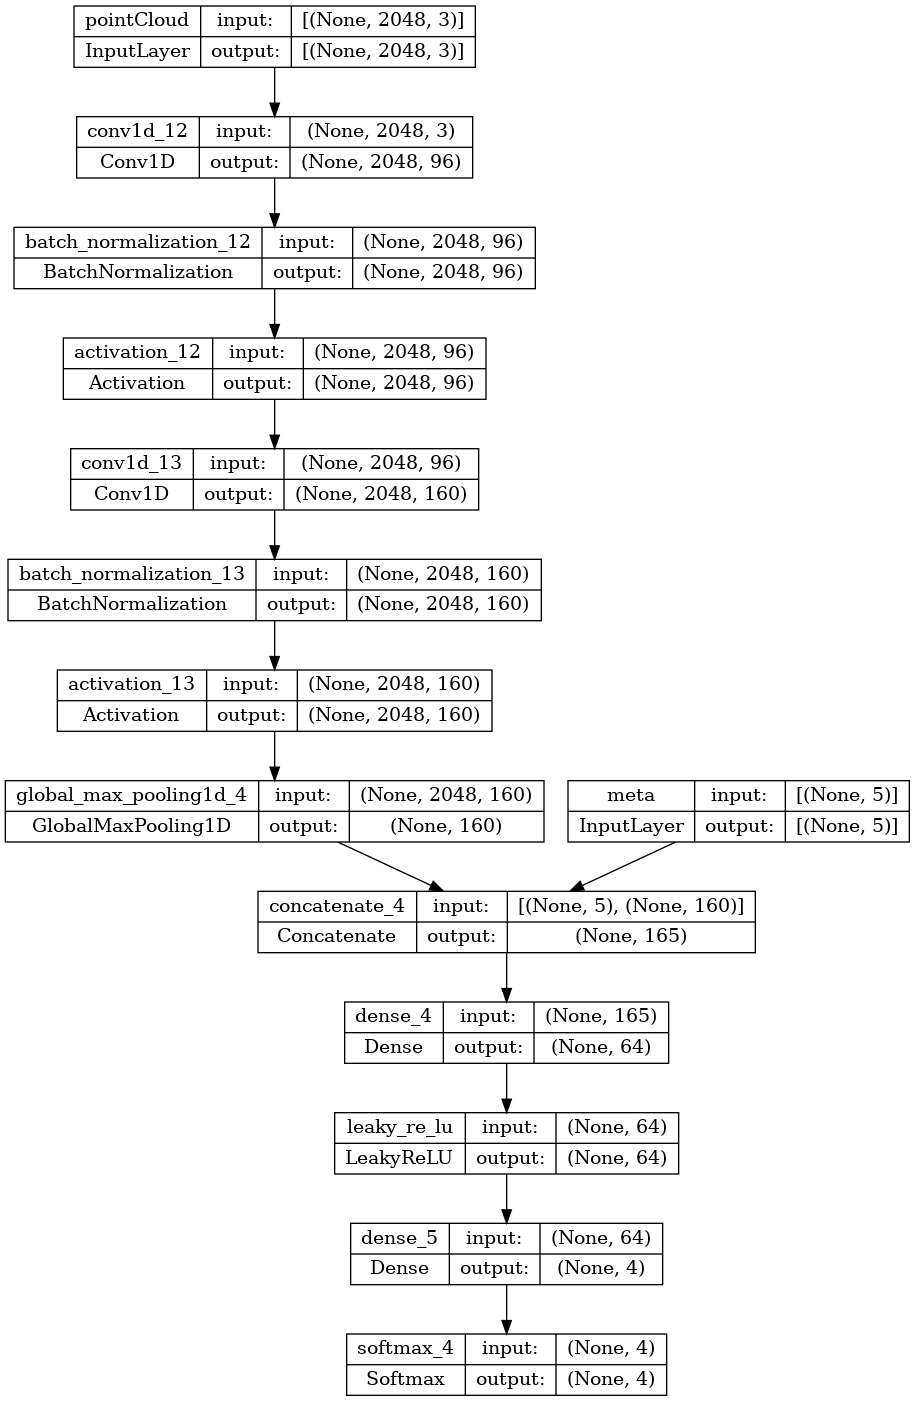

In [166]:
loaded_study = optuna.load_study(study_name='office10_is_test', storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)
keras.utils.plot_model(best_model, show_shapes=True)

In [167]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0., 1.)
    plt.show()

## チューニングの再現

In [178]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    fit_office_list = [office for office in office_list if office != test_office]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]

    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict,
                                              objective_col="countTimeMean_bin", shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221225-073120
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_41 (Conv1D)             (None, 2048, 64)     256         ['pointCloud[0][0]']             
                                                                                                  
 batch_normalization_41 (BatchN  (None, 2048, 64)    256         ['conv1d_41[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activa

In [179]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221225-073120'

In [180]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [181]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 1.0864665508270264
  Params: 
    batch_size: 128
    conv_layers: 3
    dense_layers: 0
    filters-0: 64
    filters-1: 96
    filters-2: 96
    lr: 0.07269473124284401


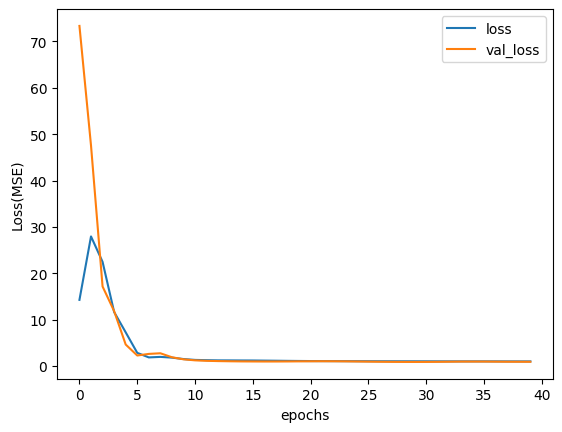

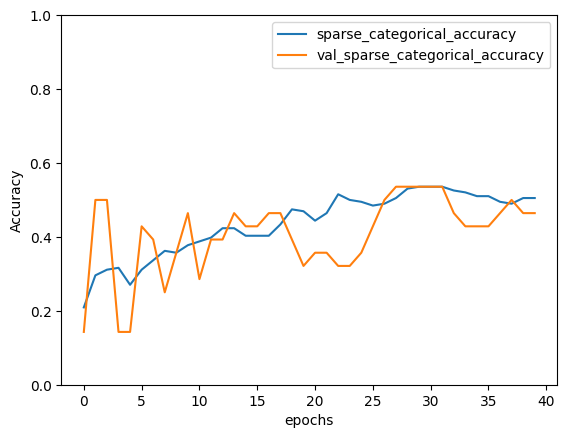

Best trial (test for office7):
  Value: 1.0082336962223053
  Params: 
    activation: ReLU
    batch_size: 4
    conv_layers: 2
    dense_layers: 3
    dropout: 0.5
    filters-0: 160
    filters-1: 32
    lr: 0.0014484281986575592
    units-0: 320
    units-1: 320
    units-2: 64


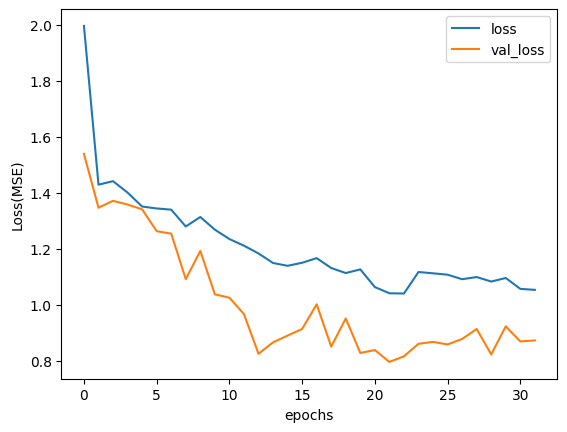

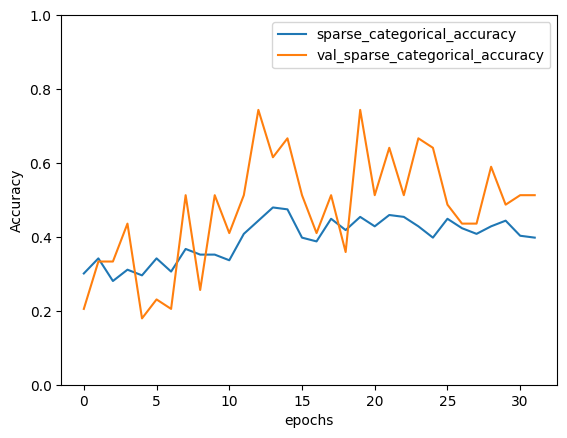

Best trial (test for office10):
  Value: 0.9904434680938721
  Params: 
    activation: LeakyReLU
    batch_size: 16
    conv_layers: 2
    dense_layers: 1
    dropout: None
    filters-0: 96
    filters-1: 160
    lr: 0.05825224500218426
    units-0: 64


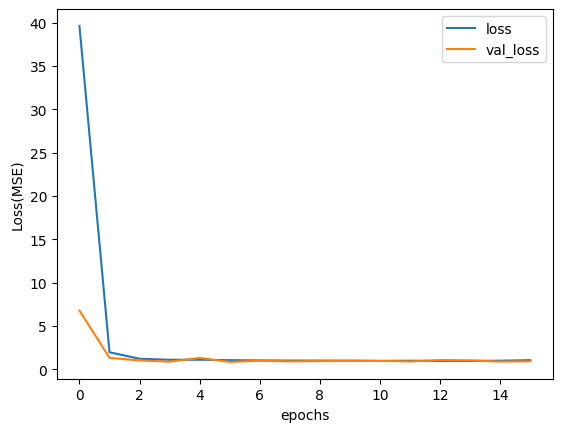

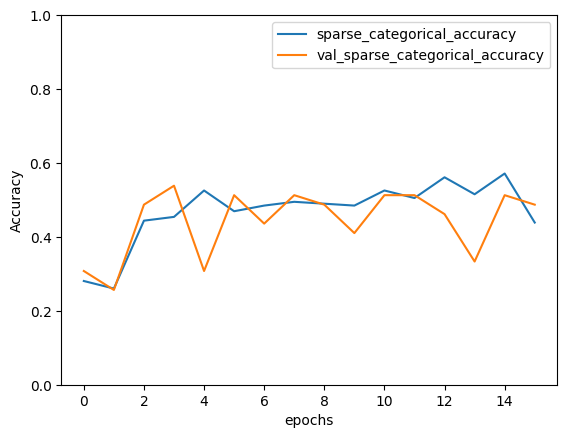

Best trial (test for office16):
  Value: 1.0381510853767395
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 2
    dense_layers: 2
    dropout: 0.3
    filters-0: 64
    filters-1: 32
    lr: 0.012798221389986274
    units-0: 320
    units-1: 384


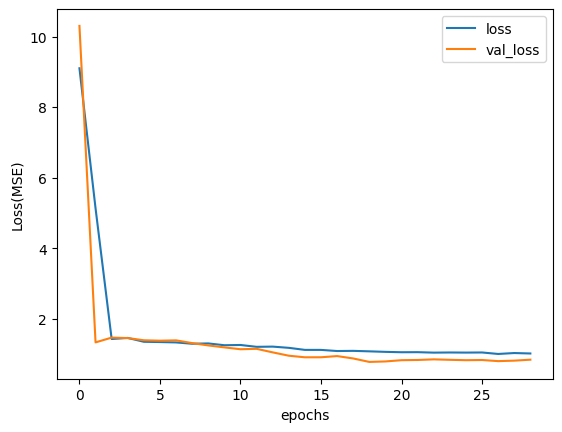

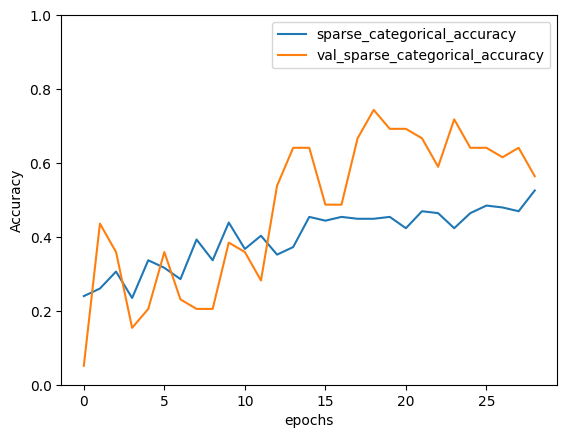

Best trial (test for office28):
  Value: 1.0151870250701904
  Params: 
    activation: LeakyReLU
    batch_size: 128
    conv_layers: 3
    dense_layers: 2
    dropout: 0.5
    filters-0: 96
    filters-1: 160
    filters-2: 96
    lr: 0.004656165009230772
    units-0: 512
    units-1: 128


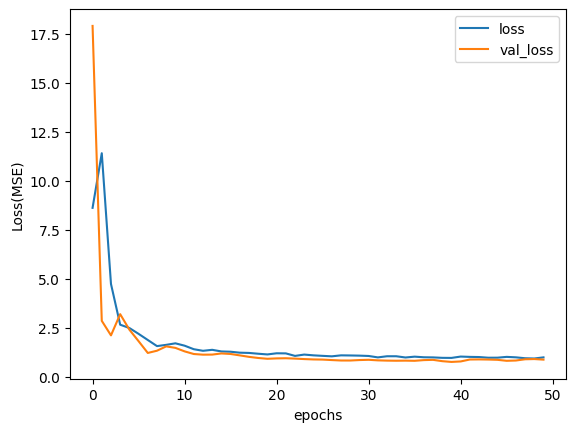

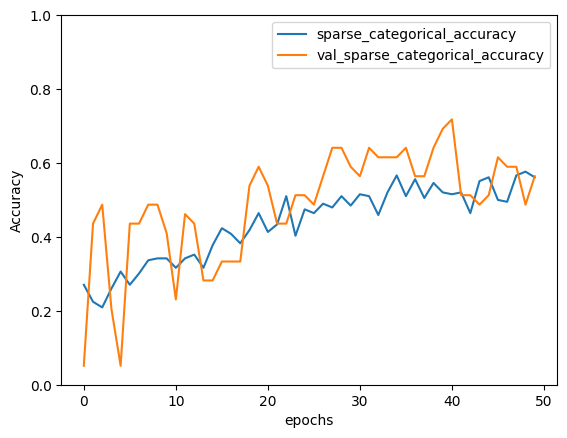

In [182]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

## 最終テスト

In [176]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_bin", shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                            objective_col="countTimeMean_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
2/2 [==============================] - 1s 314ms/step - loss: 16.3051 - sparse_categorical_accuracy: 0.2634 - val_loss: 178.6595 - val_sparse_categorical_accuracy: 0.2051
Epoch 2/200
2/2 [==============================] - 0s 47ms/step - loss: 32.0422 - sparse_categorical_accuracy: 0.2188 - val_loss: 39.5628 - val_sparse_categorical_accuracy: 0.2051
Epoch 3/200
2/2 [==============================] - 0s 62ms/step - loss: 14.5976 - sparse_categorical_accuracy: 0.3348 - val_loss: 12.7865 - val_sparse_categorical_accuracy: 0.4872
Epoch 4/200
2/2 [==============================] - 0s 49ms/step - loss: 6.5381 - sparse_categorical_accuracy: 0.3661 - val_loss: 7.1771 - val_sparse_categorical_accuracy: 0.0513
Epoch 5/200
2/2 [==============================] - 0s 50ms/step - loss: 4.3787 - sparse_categorical_accuracy: 0.2455 - val_loss: 3.2353 - val_sparse_categorical_accuracy: 0.0513
Epoch 6/200
2/2 [==============================] - 0s 62ms/step - loss: 2.0580 - 

Best trial (test for office1):
  Value: 1.0864665508270264
  Params: 
    batch_size: 128
    conv_layers: 3
    dense_layers: 0
    filters-0: 64
    filters-1: 96
    filters-2: 96
    lr: 0.07269473124284401


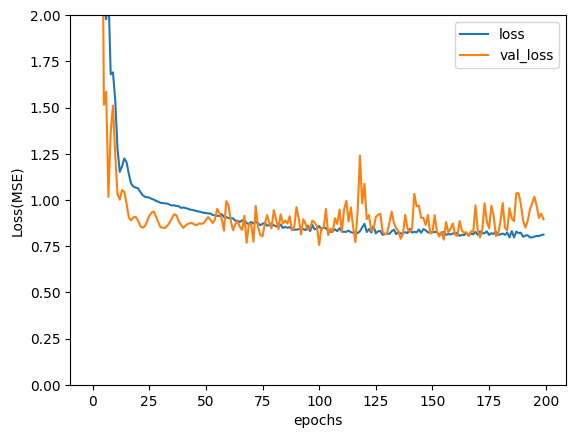

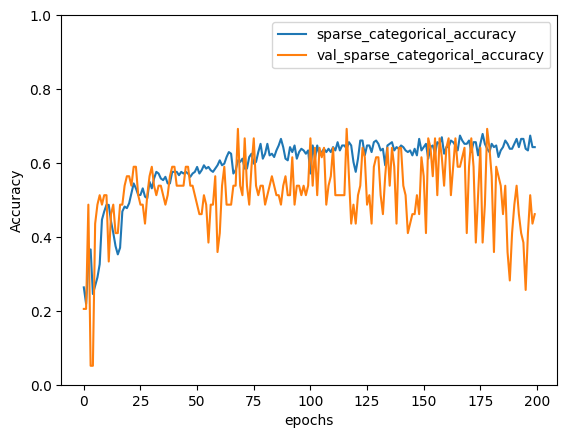

Best trial (test for office7):
  Value: 1.0082336962223053
  Params: 
    activation: ReLU
    batch_size: 4
    conv_layers: 2
    dense_layers: 3
    dropout: 0.5
    filters-0: 160
    filters-1: 32
    lr: 0.0014484281986575592
    units-0: 320
    units-1: 320
    units-2: 64


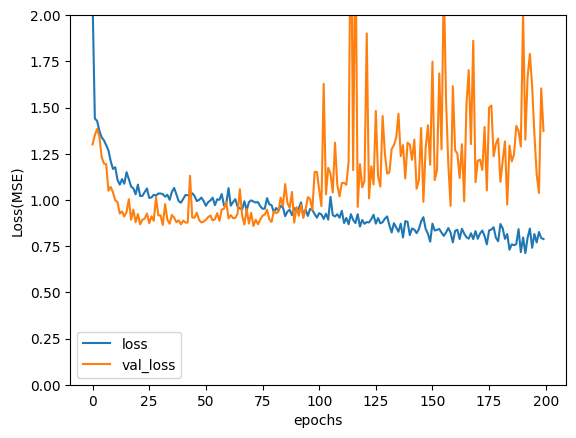

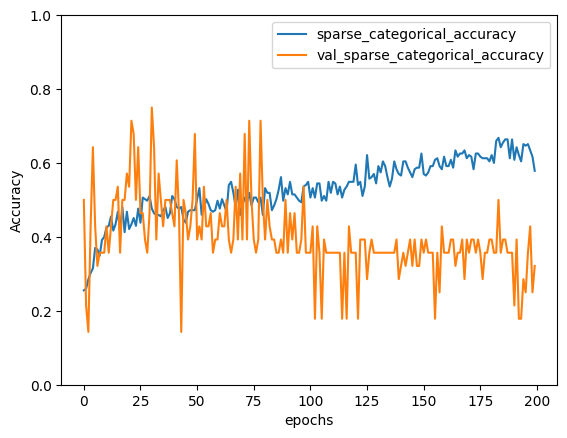

Best trial (test for office10):
  Value: 0.9904434680938721
  Params: 
    activation: LeakyReLU
    batch_size: 16
    conv_layers: 2
    dense_layers: 1
    dropout: None
    filters-0: 96
    filters-1: 160
    lr: 0.05825224500218426
    units-0: 64


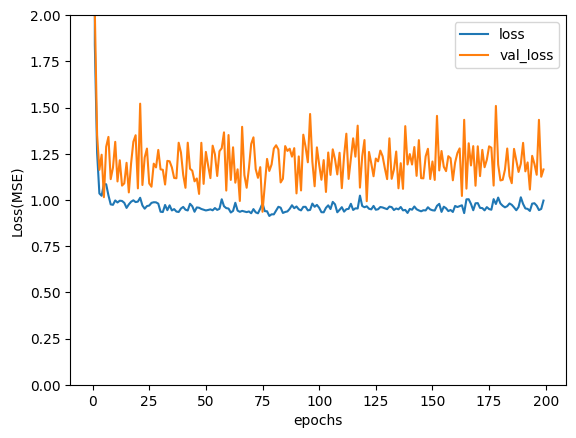

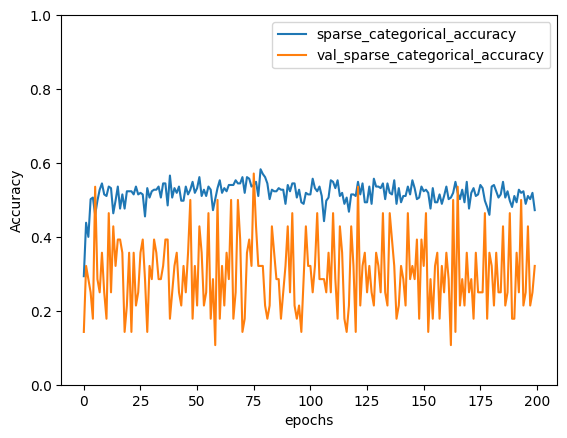

Best trial (test for office16):
  Value: 1.0381510853767395
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 2
    dense_layers: 2
    dropout: 0.3
    filters-0: 64
    filters-1: 32
    lr: 0.012798221389986274
    units-0: 320
    units-1: 384


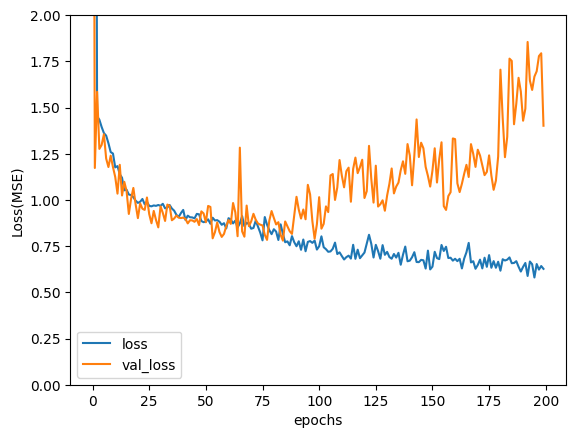

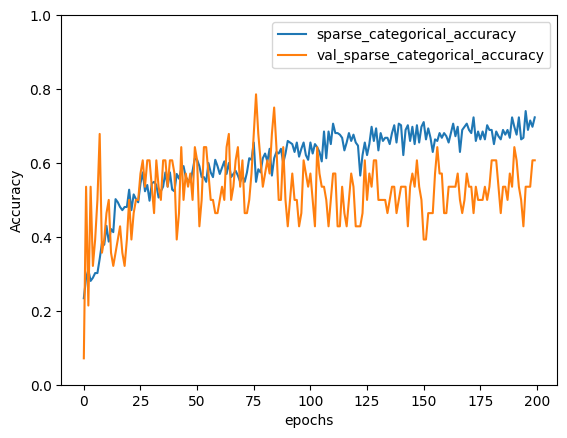

Best trial (test for office28):
  Value: 1.0151870250701904
  Params: 
    activation: LeakyReLU
    batch_size: 128
    conv_layers: 3
    dense_layers: 2
    dropout: 0.5
    filters-0: 96
    filters-1: 160
    filters-2: 96
    lr: 0.004656165009230772
    units-0: 512
    units-1: 128


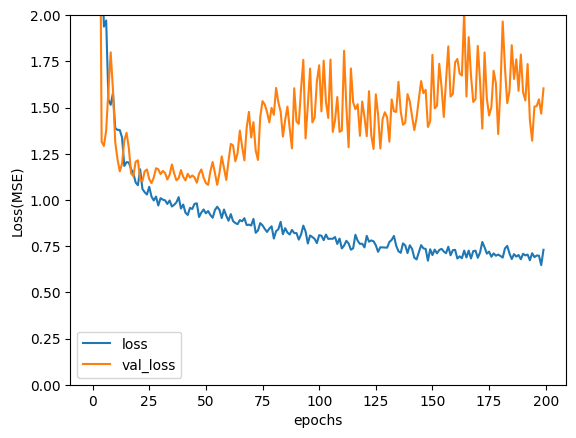

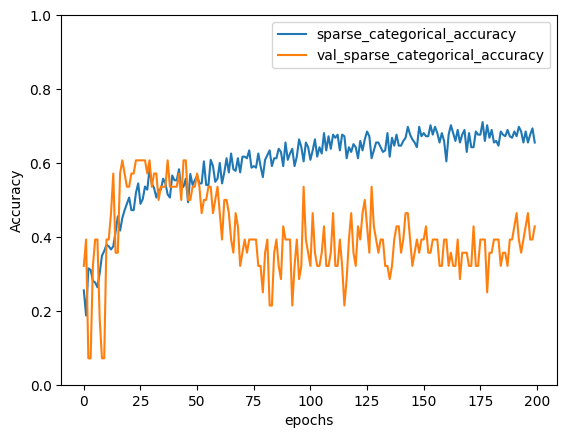

In [177]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=2.)

In [147]:
"""
最終テスト
only office10
"""

test_office="office10"

print("test_office:", test_office)
fit_office_list = [office for office in office_list if office != test_office]
    
X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_bin", shuffle=True)
X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_bin", shuffle=False)

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = (X_dict_test, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)



test_office: office10
Epoch 1/200
4/4 [==============================] - 1s 74ms/step - loss: 10.8042 - sparse_categorical_accuracy: 0.2357 - val_loss: 10.5178 - val_sparse_categorical_accuracy: 0.1071
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 7.5312 - sparse_categorical_accuracy: 0.2457 - val_loss: 2.4806 - val_sparse_categorical_accuracy: 0.2500
Epoch 3/200
4/4 [==============================] - 0s 18ms/step - loss: 2.9165 - sparse_categorical_accuracy: 0.2928 - val_loss: 3.2021 - val_sparse_categorical_accuracy: 0.1429
Epoch 4/200
4/4 [==============================] - 0s 17ms/step - loss: 1.9828 - sparse_categorical_accuracy: 0.3846 - val_loss: 2.3932 - val_sparse_categorical_accuracy: 0.1071
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 1.6095 - sparse_categorical_accuracy: 0.3821 - val_loss: 1.7381 - val_sparse_categorical_accuracy: 0.1071
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 1.3942 - spars

  Value: 1.2087711811065673
  Params: 
    batch_size: 128
    conv_layers: 2
    dense_layers: 0
    filters-0: 32
    filters-1: 32
    lr: 0.09895876709162278


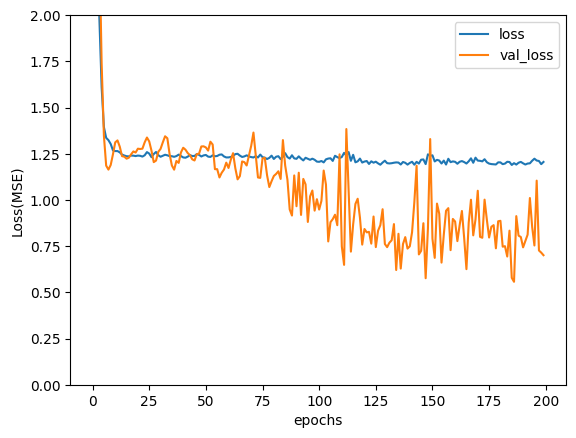

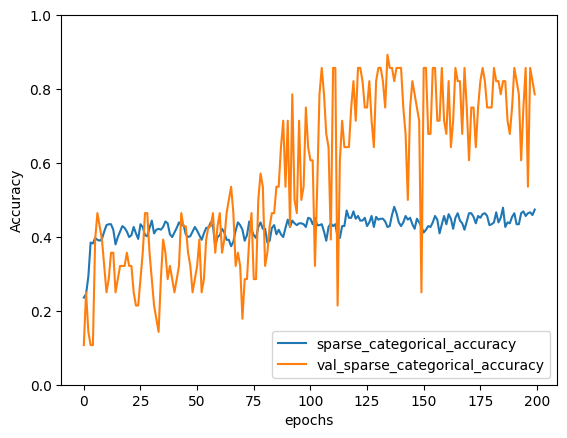

In [148]:
print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

plot_history(test_history.history, ymax=2.)

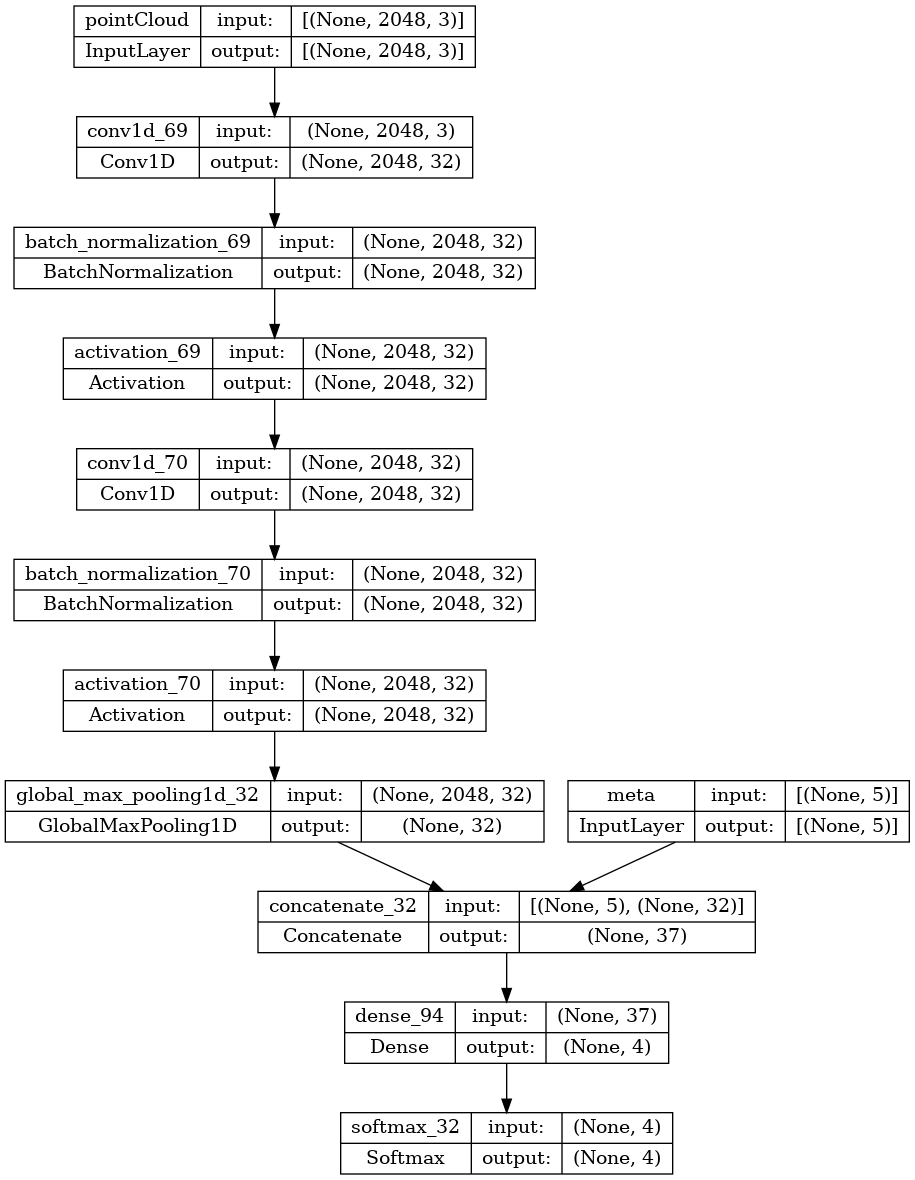

In [149]:
keras.utils.plot_model(best_model, show_shapes=True)

In [150]:
y_fit_pred_softmax = best_model.predict(X_dict_fit)
y_test_pred_softmax = best_model.predict(X_dict_test)

1/1 [==============================] - 0s 20ms/step


In [151]:
y_test.values

array([2, 3, 2, 3, 3, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [152]:
y_test_pred = y_test_pred_softmax.argmax(axis=1)
y_test_pred

array([3, 3, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [153]:
result_df = pd.DataFrame({"correct":y_test, "predict":y_test_pred})
result_df["match"] = (result_df["correct"] == result_df["predict"])
result_df

,correct,predict,match
case_name,,,
office10_0_0,2,3,False
office10_0_164_aout,3,3,True
office10_0_164_bout,2,3,False
office10_0_246_aout,3,2,False
office10_0_246_bout,3,3,True
office10_0_82_aout,3,0,False
office10_0_82_bout,2,0,False
office10_360_0,0,0,True
office10_360_164_aout,0,0,True


In [343]:
def show_office_residual_plot(train_x, train_y, test_x, test_y, office_array, figsize=[10, 8]):
    xlim = [min(min(train_x), min(test_x))-5, max(max(train_x), max(test_x))+5]
    fig= plt.figure(figsize=figsize)

    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")

    idx = 0
    for target_office_name in np.unique(office_list):
        if target_office_name == "office10":
            continue
            
        target_office_index = [i for i in range(len(office_array)) if target_office_name+"_" in office_array[i]]
        print(target_office_name, len(target_office_index))
        
        plt.scatter(train_x[target_office_index], train_y[target_office_index], 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label="Training:"+target_office_name)
        
        idx+=1
        
    plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], color="black", lw=2)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

In [344]:
y_fit.to_numpy().shape

(140,)

In [ ]:
X_dict_fit["meta"].index

In [ ]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [133]:
X_dict_fit

{'meta': array([[-1.38455178,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        ...,
        [ 0.44645519,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886],
        [ 0.44645519, -1.66695169, -0.87131147, -0.87131147,  2.51099278]]),
 'pointCloud_aircon': array([[[ 1.3765091 , -2.0106473 , -0.52029866],
         [ 1.3765091 , -1.8412895 , -0.52029866],
         [ 1.3765091 , -1.7396748 , -0.52029866],
         ...,
         [ 2.7313716 , -0.92675734, -0.52029866],
         [ 2.7313716 , -0.8251426 , -0.52029866],
         [ 2.7313716 , -0.6557848 , -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

In [85]:
df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,n_from2sec/S_bin,countTimeMean_bin
case_name,,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,1,3
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,0,3
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,0,3


In [94]:
def plot_RoI_level(classification_level):
    #オフィスごとのRoI_levelをカウントしてみる
    unique_office = np.unique(office_list)
    num_RoI_level = np.zeros((len(unique_office), classification_level))#ラベルのカウント数を保存するリスト

    #各オフィスにアクセスするループ
    count = 0#ループの回数をカウントする
    for selected_office in unique_office:
        df_selected_office = df_total[df_total["office"]==selected_office]
        #各ラベルの個数カウント
        for i in range(classification_level):
            num_RoI_level[count, i] = (df_selected_office['countTimeMean_bin'] == i).sum()

        count += 1


    #グラフの描画
    colors = ("steelblue", "limegreen", "gold","orange","crimson")
    plt.figure(figsize=[12, 8]) 
    virtical = num_RoI_level#縦軸の値
    horizontal = np.arange(unique_office.shape[0])#横軸の値
    for level in range(classification_level):
        plt.bar(x=horizontal, height=virtical[:, level], tick_label=unique_office, bottom=virtical[:, :level].sum(axis=1), color=colors[level])

    plt.ylabel("count")
    plt.xlabel("office name")
    plt.legend(np.arange(classification_level), loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

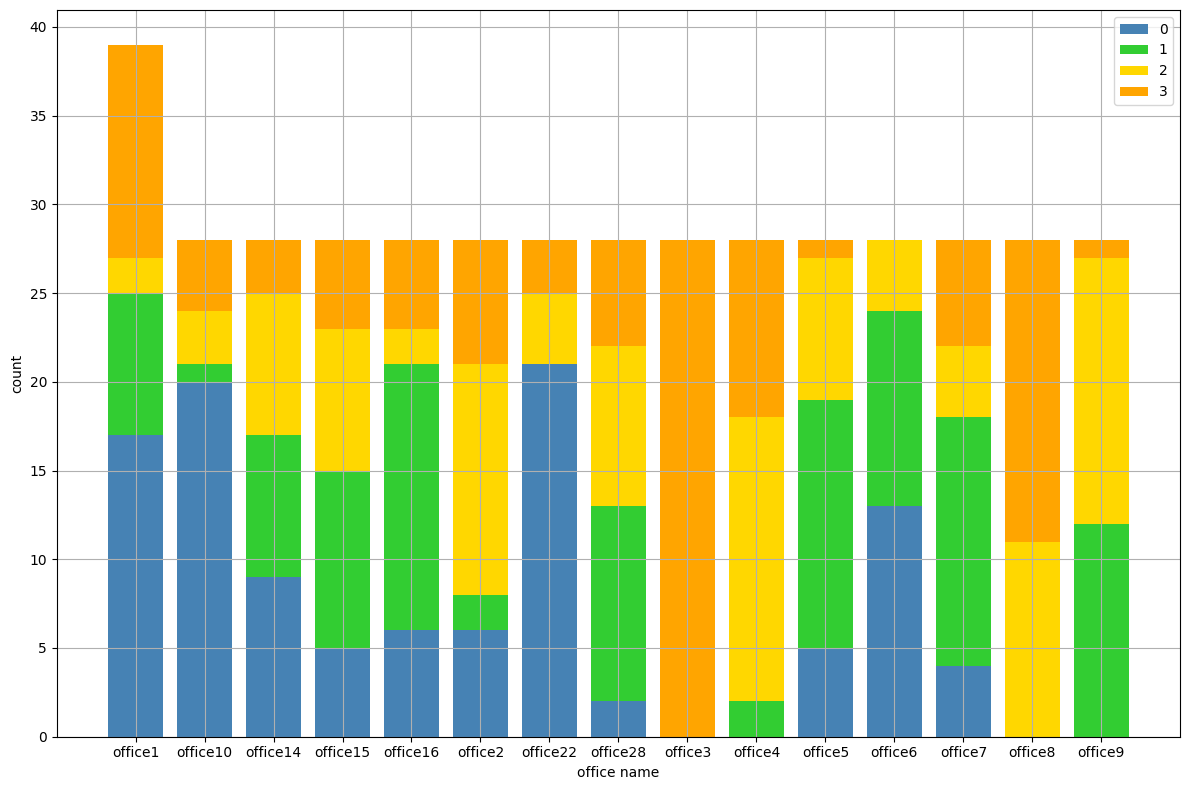

In [95]:
plot_RoI_level(4)

In [78]:
import gc
 
gc.collect()

8887

In [79]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()